In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

<h3>전처리</h3>

In [2]:
health = pd.read_csv('D:/health/Sleep_health_and_lifestyle_dataset.csv')
health

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
health.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
health['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

필요한 함수 정의

In [6]:
def show_hist(key_, class_=True):
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 3))
    max_height_lst = []
    
    tmp = health[health['Sleep Disorder'] == 'Insomnia']
    hist_values, bin_edges, _ = axs[0].hist(tmp[key_]); max_height_lst.append(np.max(hist_values));
    axs[0].set_title('Insomnia')
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')

    tmp = health[health['Sleep Disorder'] == 'None']
    hist_values, bin_edges, _ = axs[1].hist(tmp[key_]); max_height_lst.append(np.max(hist_values));
    axs[1].set_title('None')
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')

    tmp = health[health['Sleep Disorder'] == 'Sleep Apnea']
    hist_values, bin_edges, _ = axs[2].hist(tmp[key_]); max_height_lst.append(np.max(hist_values));
    axs[2].set_title('Sleep Apnea')
    axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')
    
    max_height = np.max(max_height_lst) * 1.1
    axs[0].set_ylim([0, max_height]); axs[1].set_ylim([0, max_height]); axs[2].set_ylim([0, max_height]);
    
    plt.show()
    
    if class_:
        lst = health[key_].unique()
        nrows = (len(lst)+2)//3
        fig, axs = plt.subplots(nrows,3, figsize=(13, 2.5 * nrows))
        fig.subplots_adjust(wspace=0.2, hspace=0.5)
        for i, item in enumerate(lst):
            if nrows == 1:
                idx = health[health[key_]==item].index
                axs[i%3].hist(health['Sleep Disorder'].iloc[idx])
                axs[i%3].set_title(item)
            else:
                idx = health[health[key_]==item].index
                axs[i//3][i%3].hist(health['Sleep Disorder'].iloc[idx])
                axs[i//3][i%3].set_title(item)
        plt.show()

def show_scatter(X, y, ax = None, title = None):
    markers = ['^', 's', '*']
    mydf = X.copy()
    mydf['label'] = y
    
    if ax is None:
        fig, axs = plt.subplot(1,1)
        show_plt = True
    else:
        show_plt = False
    
    for i, marker in enumerate(markers):
        x = mydf[mydf['label']==i].iloc[:,0]
        y = mydf[mydf['label']==i].iloc[:,1]
        ax.scatter(x, y, marker=marker, label=(str(i) + ' ' + answer.inverse_transform([i])[0]))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),
          ncol=3, fancybox=True)
    if not title is None:
        ax.set_title(title)
    ax.set_xlabel("1st feature")
    ax.set_ylabel("2nd feature")
    
    if show_plt:
        plt.show()
        
def get_scatter_train_test(X_train, X_test, y_train, y_test, axs, title = ('Train set', 'Test Set')):
    markers = ['^', 's', '*']

    df_tmp1 = X_train.copy()
    df_tmp1['target'] = y_train
    df_tmp2 = X_test.copy()
    df_tmp2['target'] = y_test;

    #fig, axs = plt.subplots(1, 2, figsize=(12,4.5))

    for i, marker in enumerate(markers):
        x = df_tmp1[df_tmp1['target']==i].iloc[:,0]
        y = df_tmp1[df_tmp1['target']==i].iloc[:,1]
        axs[0].scatter(x, y, marker=marker, label=answer.inverse_transform([i])[0])
        x = df_tmp2[df_tmp2['target']==i].iloc[:,0]
        y = df_tmp2[df_tmp2['target']==i].iloc[:,1]
        axs[1].scatter(x, y, marker=marker, label=answer.inverse_transform([i])[0])
        
    #Outlier
    if df_tmp1[(df_tmp1['target']==-1) | (df_tmp1['target']>=4)].shape[0] >= 1:
        x = df_tmp1[(df_tmp1['target']==-1) | (df_tmp1['target']>=4)].iloc[:,0]
        y = df_tmp1[(df_tmp1['target']==-1) | (df_tmp1['target']>=4)].iloc[:,1]
        axs[0].scatter(x, y, marker='.', label='Outlier')
    if df_tmp2[(df_tmp2['target']==-1) | (df_tmp2['target']>=4)].shape[0] >= 1:
        x = df_tmp2[(df_tmp2['target']==-1) | (df_tmp2['target']>=4)].iloc[:,0]
        y = df_tmp2[(df_tmp2['target']==-1) | (df_tmp2['target']>=4)].iloc[:,1]
        axs[1].scatter(x, y, marker='.', label='Outlier')
        
    axs[0].set_title(title[0]);
    axs[1].set_title(title[1])
    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          ncol=3, fancybox=True)
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          ncol=3, fancybox=True)

def scatter_train_test(X_train, X_test, y_train, y_test, titles = ('Train set', 'Test Set')):
    fig, axs = plt.subplots(1, 2, figsize=(12,4.5))
    get_scatter_train_test(X_train, X_test, y_train, y_test, axs, titles)
    plt.show()

<h3>BMI Category</h3>

In [7]:
health['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [8]:
for i in health[health['BMI Category'] == 'Normal Weight'].index:
    health.loc[i, 'BMI Category'] = 'Normal'
for i in health[health['BMI Category'] == 'Obese'].index:
    health.loc[i, 'BMI Category'] = 'Overweight'
    
health['BMI Category'].value_counts()

Normal        216
Overweight    158
Name: BMI Category, dtype: int64

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


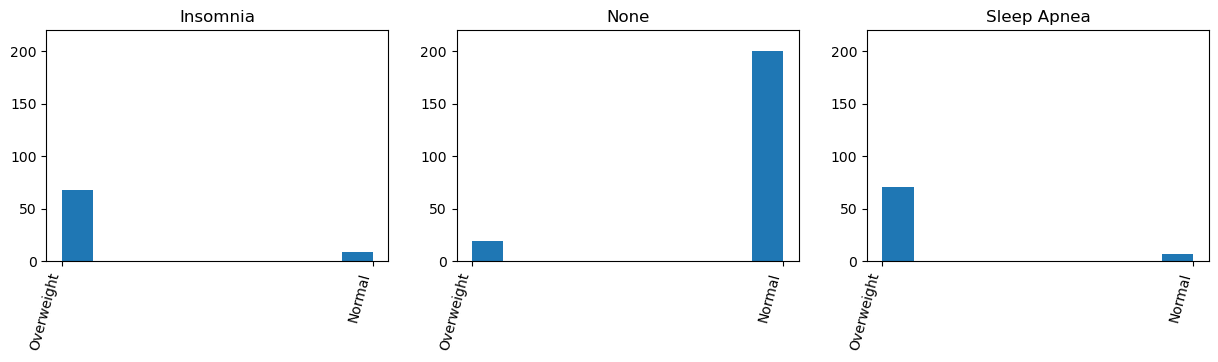

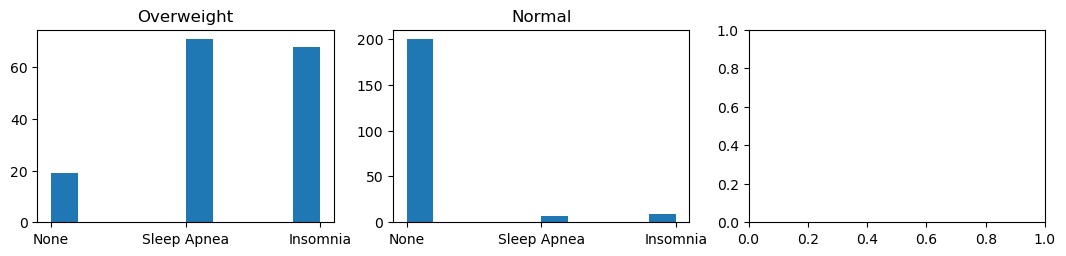

In [9]:
show_hist('BMI Category')

Overweight일 수록 Sleep Apnea, Insomnia일 확률 증가

In [10]:
BMI_dummy = pd.get_dummies(health['BMI Category'])
health = pd.concat([health, BMI_dummy], axis=1)
health.drop(['BMI Category'], axis=1, inplace=True)

<h3>Person ID</h3>

In [11]:
health.drop(['Person ID'], axis=1,inplace=True) #단순 ID

<h3>Gender</h3>

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


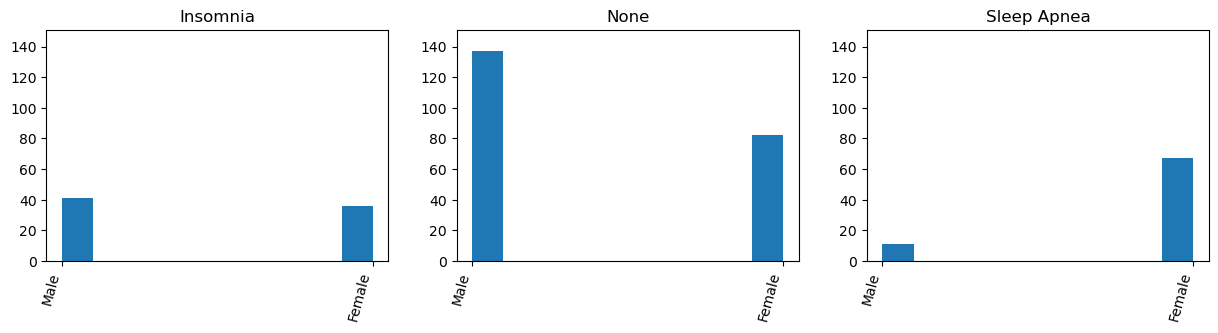

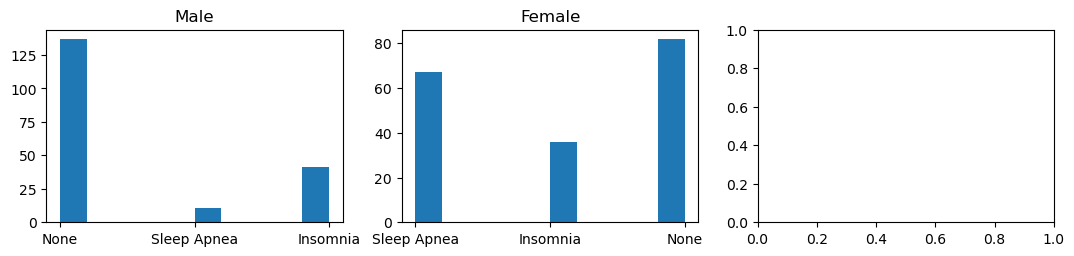

In [12]:
show_hist('Gender')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
health['Gender'] = le.fit_transform(health['Gender'])
health['Gender'].value_counts()

1    189
0    185
Name: Gender, dtype: int64

<h3>Age</h3>

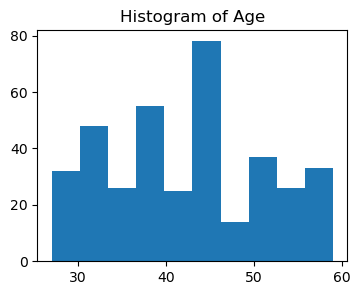

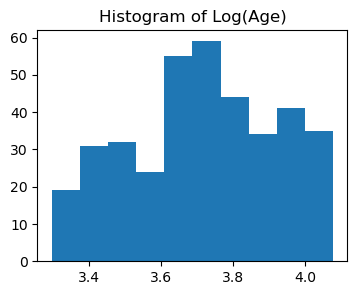

In [14]:
plt.figure(figsize=(4,3)); plt.hist(health['Age']); plt.title('Histogram of Age'); plt.show()
plt.figure(figsize=(4,3)); plt.hist(np.log(health['Age'])); plt.title('Histogram of Log(Age)'); plt.show()

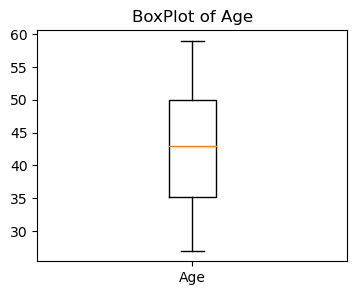

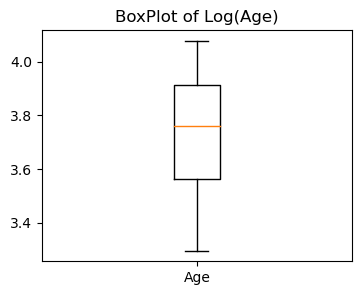

In [15]:
plt.figure(figsize=(4,3)); plt.boxplot(health['Age'], labels=['Age']); plt.title('BoxPlot of Age'); plt.show()
plt.figure(figsize=(4,3)); plt.boxplot(np.log(health['Age']), labels=['Age']); plt.title('BoxPlot of Log(Age)'); plt.show()

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


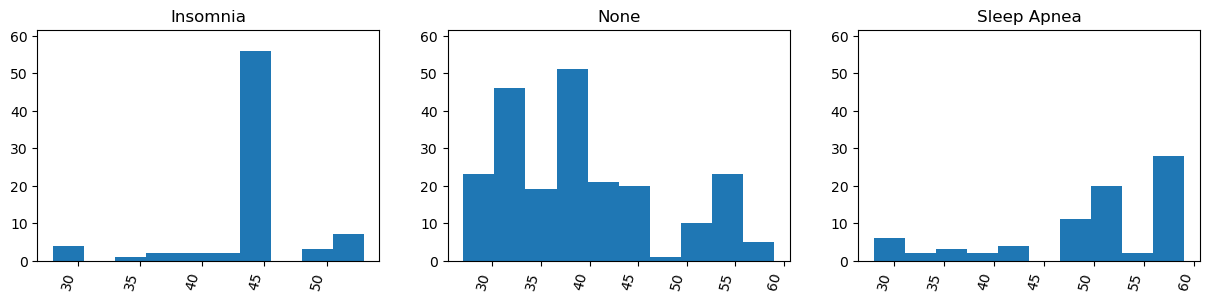

In [16]:
show_hist('Age', class_=False)

In [17]:
health.drop(['Age'], axis=1, inplace=True)

<h3>Occupation</h3>

In [18]:
print(health['Occupation'].value_counts())
todrop = health['Occupation'].isin(['Software Engineer', 'Scientist', 'Sales Representative', 'Manager'])
health.drop(health[todrop].index, axis=0, inplace=True)
health.reset_index(drop=True, inplace=True)

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64


In [19]:
health.groupby(['Occupation'])['Sleep Disorder'].value_counts()

Occupation   Sleep Disorder
Accountant   None              30
             Insomnia           7
Doctor       None              64
             Sleep Apnea        4
             Insomnia           3
Engineer     None              57
             Insomnia           5
             Sleep Apnea        1
Lawyer       None              42
             Sleep Apnea        3
             Insomnia           2
Nurse        Sleep Apnea       61
             None               9
             Insomnia           3
Salesperson  Insomnia          29
             None               2
             Sleep Apnea        1
Teacher      Insomnia          27
             None               9
             Sleep Apnea        4
Name: Sleep Disorder, dtype: int64

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


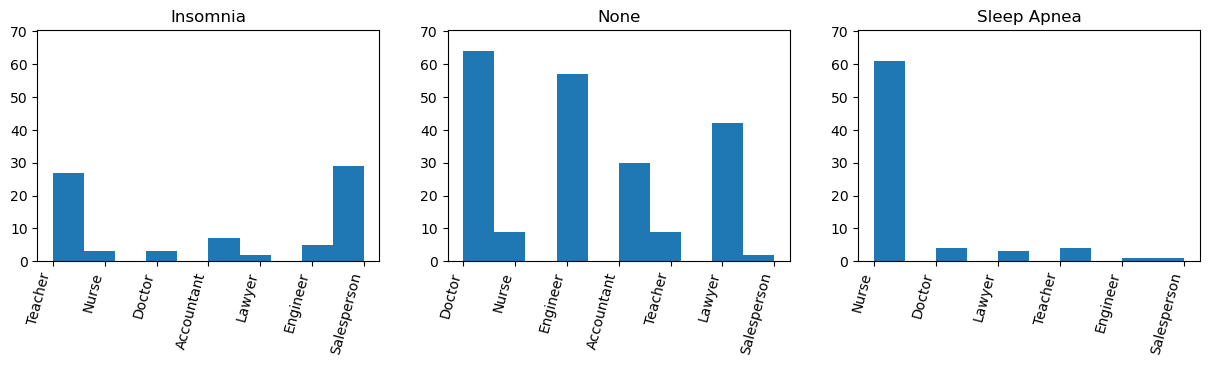

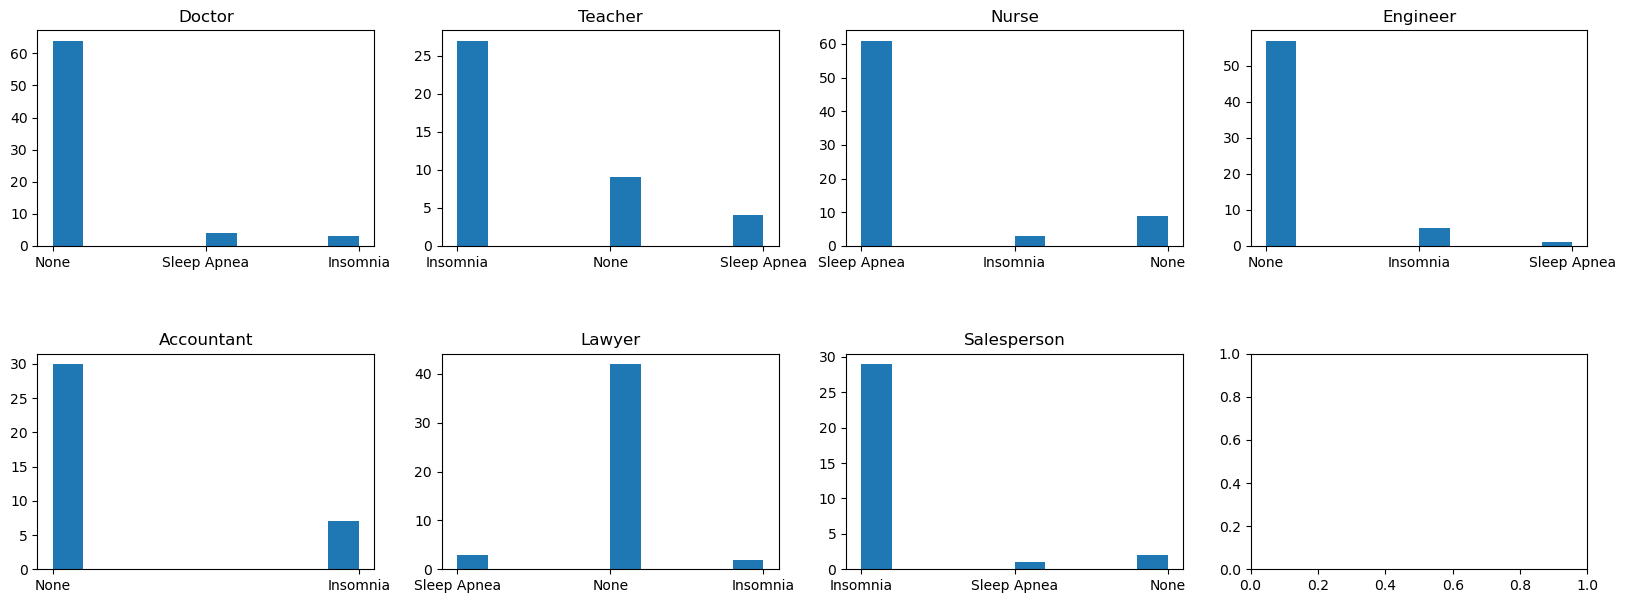

In [20]:
show_hist('Occupation', class_=False)

lst = health['Occupation'].unique()
nrows = (len(lst)+3)//4
fig, axs = plt.subplots(nrows,4, figsize=(20, 3.5 * nrows))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
for i, item in enumerate(lst):
    if nrows == 1:
        idx = health[health['Occupation']==item].index
        axs[i%4].hist(health['Sleep Disorder'].iloc[idx])
        axs[i%4].set_title(item)
    else:
        idx = health[health['Occupation']==item].index
        axs[i//4][i%4].hist(health['Sleep Disorder'].iloc[idx])
        axs[i//4][i%4].set_title(item)
plt.show()

In [21]:
grid = []
grid.append(['Doctor', ['Sleep Apnea', 'Insomnia']])
grid.append(['Nurse', ['Insomnia']])
grid.append(['Engineer', ['Insomnia', 'Sleep Apnea']])
grid.append(['Lawyer', ['Sleep Apnea', 'Insomnia']])
grid.append(['Salesperson', ['Sleep Apnea', 'None']])

for key, disorder in grid:
    for i in health[(health['Occupation'] == key) & health['Sleep Disorder'].isin(disorder)].index:
        health.loc[i, 'Sleep Disorder'] = np.NaN

health.dropna(inplace=True)

In [22]:
Occupation_dummy = pd.get_dummies(health['Occupation'])
Occupation_dummy[['Salesperson', 'Teacher']]
health = pd.concat([health, Occupation_dummy[['Salesperson', 'Teacher']]], axis=1)
health.drop(['Occupation'], axis=1, inplace=True)

<h3>Sleep Duration</h3>

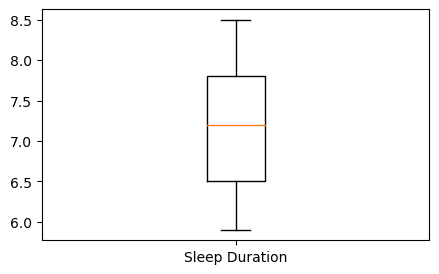

In [23]:
plt.figure(figsize=(5,3)); plt.boxplot(health['Sleep Duration'], labels=['Sleep Duration']); plt.show()

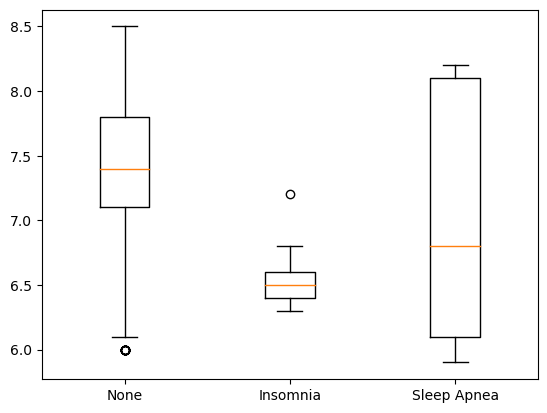

None: 17
Insomnia: 1
Sleep Apnea: 0


In [24]:
Sleep_Duration = []
Sleep_Disorder_list = health['Sleep Disorder'].unique()
for dis in Sleep_Disorder_list:
    Sleep_Duration.append(health[health['Sleep Disorder'] == dis]['Sleep Duration'])

plt.boxplot(Sleep_Duration, labels=Sleep_Disorder_list)
plt.show()

for i in range(len(Sleep_Disorder_list)):
    Q1 = Sleep_Duration[i].quantile(q=0.25)
    Q2 = Sleep_Duration[i].quantile(q=0.75)
    iqr=Q2-Q1
    lower = Q1-1.5*iqr
    upper = Q2+1.5*iqr
    lower_outlier = health[(health['Sleep Duration'] > lower) & (health['Sleep Disorder']==Sleep_Disorder_list[i])]['Sleep Duration'].min()
    upper_outlier = health[(health['Sleep Duration'] < upper) & (health['Sleep Disorder']==Sleep_Disorder_list[i])]['Sleep Duration'].max()
    sleep_outlier = health[((health['Sleep Duration'] > upper_outlier) | (health['Sleep Duration'] < lower_outlier)) & (health['Sleep Disorder']==Sleep_Disorder_list[i])]
    res = sleep_outlier['Sleep Disorder'].value_counts()
    if(res.shape[0] > 0):
        print(Sleep_Disorder_list[i] + ': ' + str(res[0]))
    else:
        print(Sleep_Disorder_list[i] + ': 0')
    for i in sleep_outlier.index:
        health.loc[i, 'Sleep Duration'] = np.NaN
health.dropna(inplace=True)

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


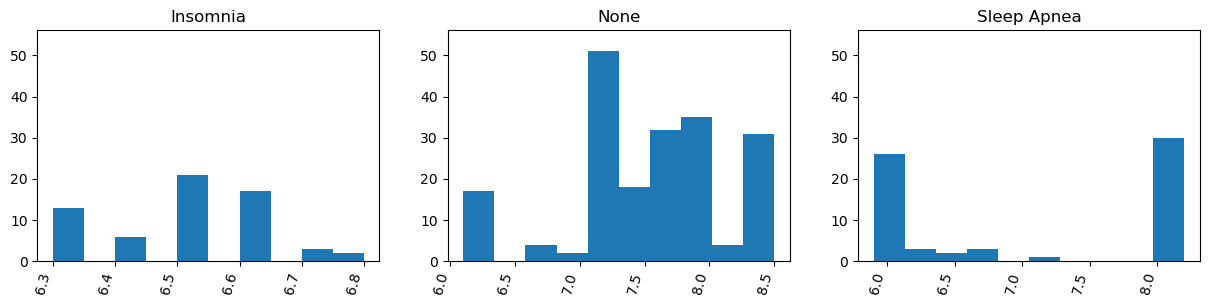

count    321.000000
mean       7.220872
std        0.768217
min        5.900000
25%        6.500000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [25]:
show_hist('Sleep Duration', class_=False)
health['Sleep Duration'].describe()

<h3>Quality of Sleep</h3>

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


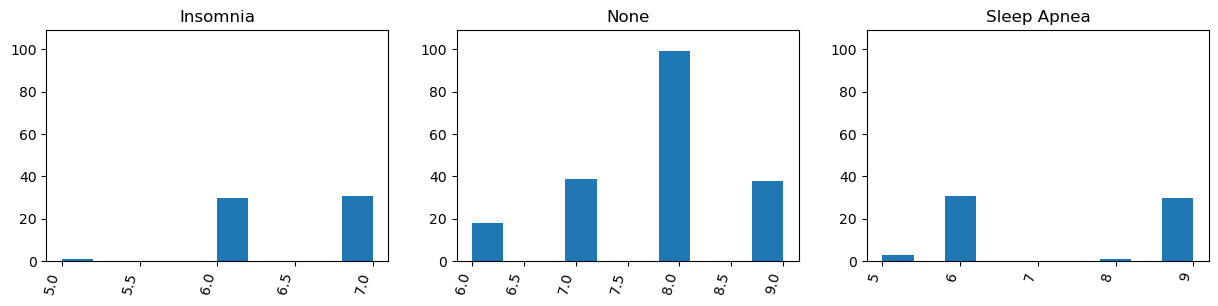

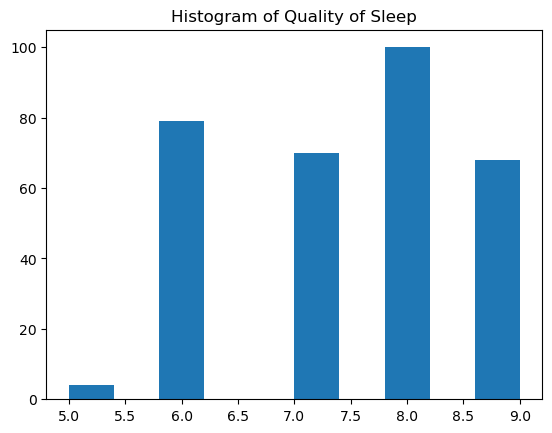

In [26]:
show_hist('Quality of Sleep', class_=False)
plt.hist(health['Quality of Sleep']); plt.title('Histogram of Quality of Sleep'); plt.show()

In [27]:
health.drop(health[health['Quality of Sleep'].isin([4, 5])].index, axis=0, inplace=True)
health.drop(['Quality of Sleep'], axis=1, inplace=True)

<h3>Physical Activity Level</h3>

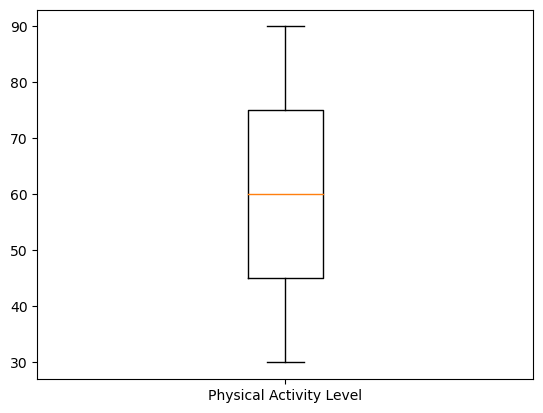

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


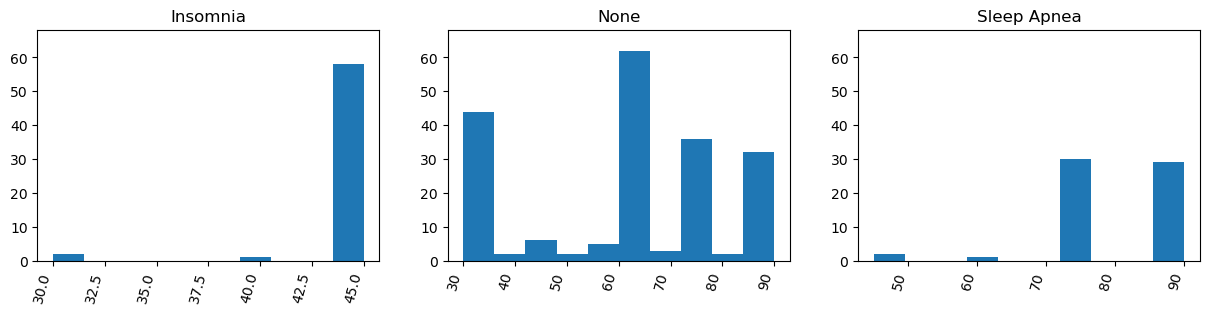

In [28]:
plt.boxplot(health['Physical Activity Level'], labels=['Physical Activity Level']); plt.show()
show_hist('Physical Activity Level', class_=False)

<h3>Stress Level</h3>

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


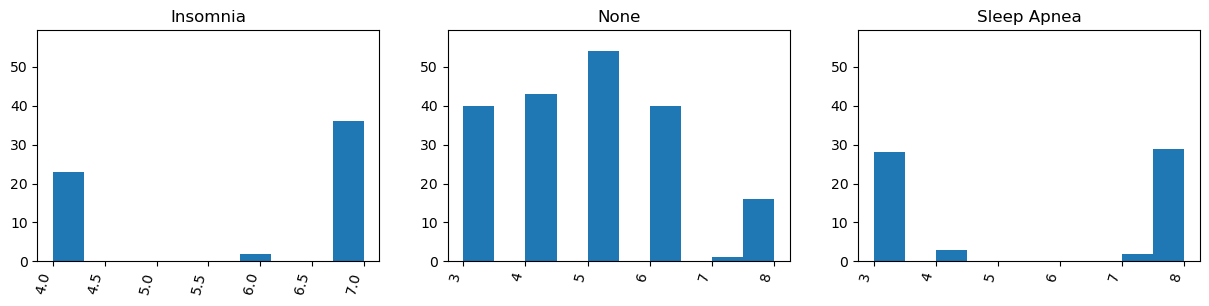

In [29]:
show_hist('Stress Level', class_=False)
health.drop(['Stress Level'], axis=1, inplace=True)

<h3>Blood Pressure</h3>

In [30]:
health.drop(['Blood Pressure'], axis=1, inplace=True)

<h3>Heart Rate</h3>

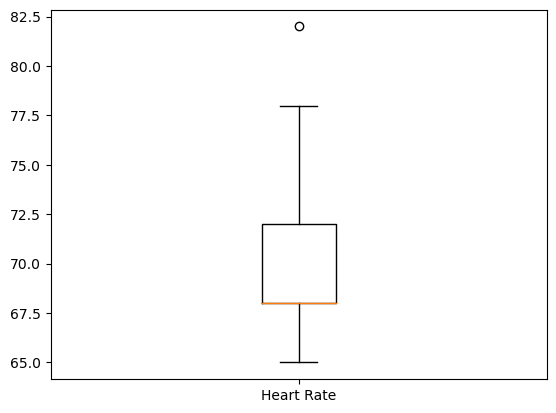

In [31]:
plt.boxplot(health['Heart Rate'], labels=['Heart Rate']); plt.show()

Q1 = health['Heart Rate'].quantile(q=0.25)
Q2 = health['Heart Rate'].quantile(q=0.75)
iqr=Q2-Q1
lower = Q1-1.5*iqr
upper = Q2+1.5*iqr
lower_outlier = health[(health['Heart Rate'] > lower)]['Heart Rate'].min()
upper_outlier = health[(health['Heart Rate'] < upper)]['Heart Rate'].max()

heartrate_outlier = health[(health['Heart Rate'] > upper_outlier) | (health['Heart Rate'] < lower_outlier)]

for i in heartrate_outlier.index:
    health.loc[i, 'Heart Rate'] = np.NaN

health.dropna(inplace=True)

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


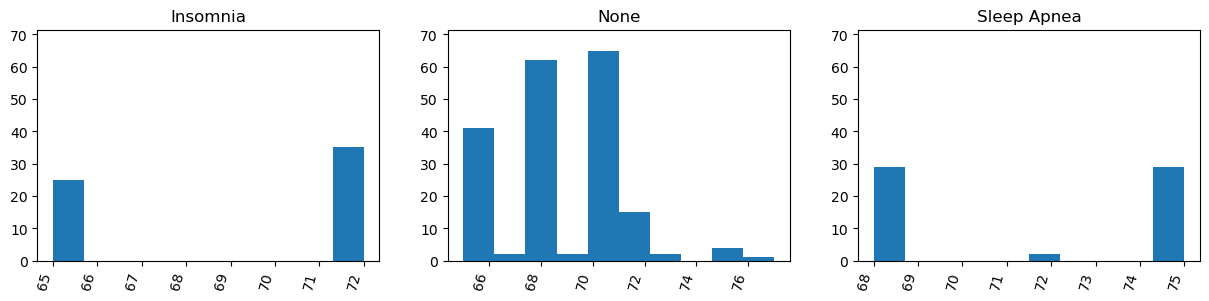

In [32]:
show_hist('Heart Rate', class_=False)

In [33]:
health.drop(['Heart Rate'], axis=1, inplace = True)

<h3>Daily Steps</h3>

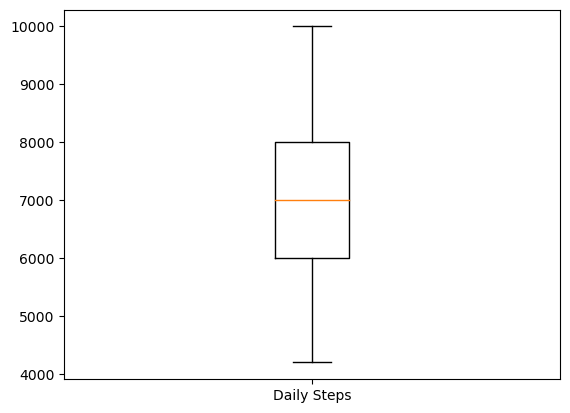

C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75, ha='right')
C:\Users\kijun\AppData\Local\Temp\ipykernel_9596\1474210039.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=75, ha='right')


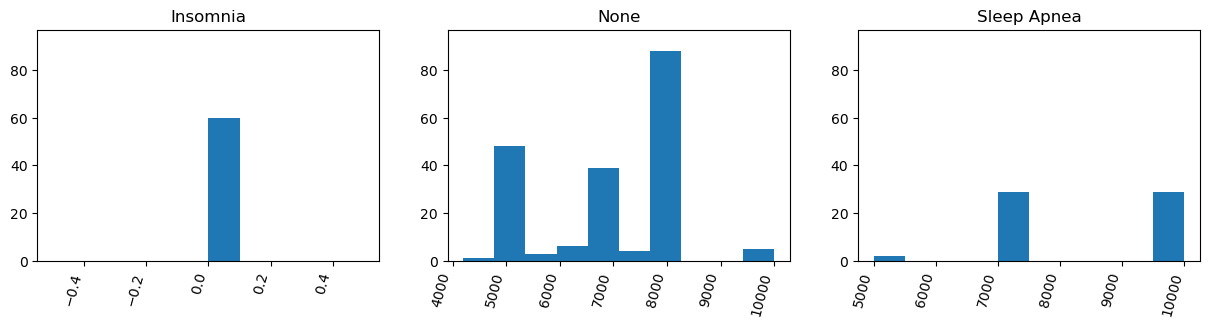

In [34]:
plt.boxplot(health['Daily Steps'], labels=['Daily Steps']); plt.show()
show_hist('Daily Steps', class_=False)

In [35]:
health.groupby(['Sleep Disorder'])['Daily Steps'].value_counts()
health.reset_index(drop=True, inplace=True)

<h3>Sleep Disorder Label Encoding</h3>

In [36]:
answer = LabelEncoder()
health['Sleep Disorder'] = answer.fit_transform(health['Sleep Disorder'])

<h3>LDA</h3>

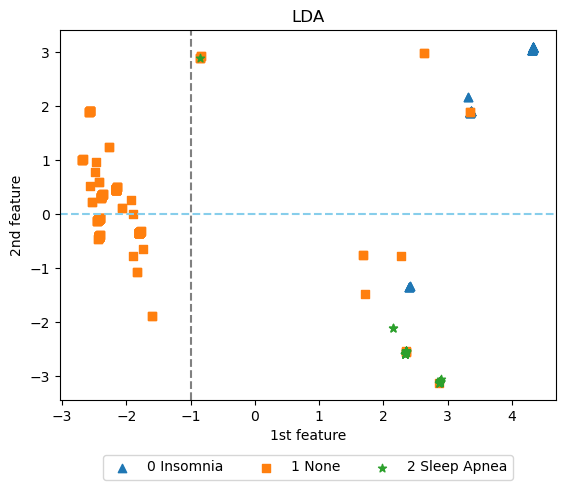

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
markers = ['^', 's', '*']

data, target = health.drop(['Sleep Disorder'], axis=1), health['Sleep Disorder']

health_lda = lda.fit_transform(data, target)
lda_df = pd.DataFrame(health_lda, columns=['1st Feature', '2nd Feature'])

markers = ['^', 's', '*']
mydf = lda_df.copy()
mydf['label'] = target
for i, marker in enumerate(markers):
    x = mydf[mydf['label']==i].iloc[:,0]
    y = mydf[mydf['label']==i].iloc[:,1]
    plt.scatter(x, y, marker=marker, label=(str(i) + ' ' + answer.inverse_transform([i])[0]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),
      ncol=3, fancybox=True)
plt.title('LDA')
    
plt.axvline(x=-1, color='gray', linestyle='--')
plt.axhline(y=0, color='skyblue', linestyle='--')
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
plt.show()

lda_df['target'] = target

In [38]:
lda_df['target'].value_counts()

1    194
2     60
0     60
Name: target, dtype: int64

In [39]:
print(answer.transform(['Insomnia', 'None', 'Sleep Apnea']))
print('--Insomnia--')
print(lda_df[(lda_df['2nd Feature'] < 0) & (lda_df['target'] == 0)].shape[0]); print(lda_df[(lda_df['2nd Feature'] >= 0) & (lda_df['target'] == 0)].shape[0])
print('--None--')
print(lda_df[(lda_df['1st Feature'] >= 0) & (lda_df['target'] == 1)].shape[0]); print(lda_df[(lda_df['1st Feature'] < 0) & (lda_df['target'] == 1)].shape[0])
print('--Sleep Apnea--')
print(lda_df[(lda_df['2nd Feature'] > 0) & (lda_df['target'] == 2)].shape[0]); print(lda_df[(lda_df['2nd Feature'] <= 0) & (lda_df['target'] == 2)].shape[0])

[0 1 2]
--Insomnia--
6
54
--None--
12
182
--Sleep Apnea--
1
59


<h3>Train_Test_Split, SMOTE</h3>

In [40]:
X, y = lda_df.drop(['target'], axis=1), lda_df['target']

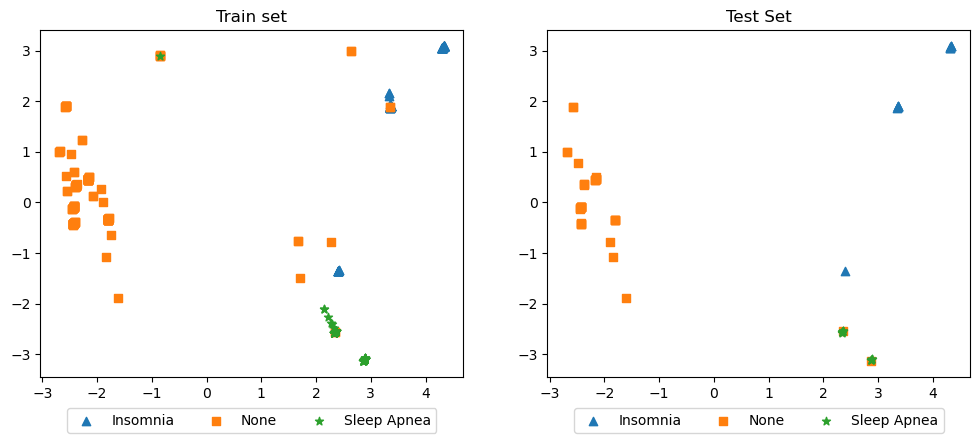

[0 1 2]
--Insomnia--
11
144
--None--
10
145
--Sleep Apnea--
1
154


In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=30)
smote = SMOTE(random_state=20)
X_train, y_train = smote.fit_resample(X_train0, y_train0)

df_ = X_train.copy()
df_ = pd.DataFrame(df_)
scatter_train_test(X_train, X_test, y_train, y_test)
df_['target'] = y_train

print(answer.transform(['Insomnia', 'None', 'Sleep Apnea']))
print('--Insomnia--')
print(df_[(df_['2nd Feature'] < 0) & (df_['target'] == 0)].shape[0]); print(df_[(df_['2nd Feature'] >= 0) & (df_['target'] == 0)].shape[0])
print('--None--')
print(df_[(df_['1st Feature'] >= 0) & (df_['target'] == 1)].shape[0]); print(df_[(df_['1st Feature'] < 0) & (df_['target'] == 1)].shape[0])
print('--Sleep Apnea--')
print(df_[(df_['2nd Feature'] > 0) & (df_['target'] == 2)].shape[0]); print(df_[(df_['2nd Feature'] <= 0) & (df_['target'] == 2)].shape[0])

Class이므로 Train_Test_Split에서 Stratify 적용

<h3>군집화 알고리즘</h3>

필요한 함수 정의

In [42]:
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
        
def show_cluster(model, X_, title, ax = None, label_ = True, show_all = False):
    markers = ['^', 's', '*', 'D', '+', '1']
    
    if label_:
        df = X_train.copy()
        df['label'] = model.labels_
    else:
        df = X_.copy()
        df['label'] = model.predict(X_)
        
    centers = []
    for i in range(len(np.unique(df['label']))):
        centers.append([np.mean(df[df['label'] == i]['1st Feature']), np.mean(df[df['label'] == i]['2nd Feature'])])
    
    ncol = 0
    
    if ax is None:
        fig, ax = plt.subplots(1,1)
        show_plt = True
    else:
        show_plt = False;
    
    for i in np.unique(df['label']):
        if show_all:
            flag = (i >= 0)
        else:
            flag = (i >=0) and (i <= 2)
        
        if flag:
            x = df[df['label']==i].iloc[:,0]
            y = df[df['label']==i].iloc[:,1]
            ax.scatter(x, y, marker='s', edgecolor='k', s=50, label = i)

            center = centers[i]
            ax.scatter(center[0], center[1], s=200, color='white', alpha=0.8, edgecolor='k', marker='s')
            ax.scatter(center[0], center[1], s=70, color='k', edgecolor='k', marker='$%d$' % i)
            ncol = ncol + 1
    
    #Outlier
    if not show_all:
        if df[(df['label']==-1) | (df['label']>=3)].shape[0] >= 1:
            x = df[(df['label']==-1) | (df['label']>=3)].iloc[:,0]
            y = df[(df['label']==-1) | (df['label']>=3)].iloc[:,1]
            ax.scatter(x, y, marker='.', label='Outlier', color='r')
            ax.legend()
            ncol = ncol + 1
    else:
        if df[(df['label']==-1)].shape[0] >= 1:
            x = df[(df['label']==-1) | (df['label']>=3)].iloc[:,0]
            y = df[(df['label']==-1) | (df['label']>=3)].iloc[:,1]
            ax.scatter(x, y, marker='.', label='Outlier', color='r')
            ax.legend()
            ncol = ncol + 1
        
            
    if ncol > 5:
        ncol = 5
        
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          ncol=ncol, fancybox=True)
    ax.set_title(title)
    if show_plt:
        plt.show()
    
def scatter_yhats(X_train, X_test, y_train, y_test, y_train_hat, y_test_hat, title):
    fig, axs = plt.subplots(2,2, figsize=(12,9.6))
    fig.subplots_adjust(hspace=0.3)
    get_scatter_train_test(X_train, X_test, y_train, y_test, axs[0])
    get_scatter_train_test(X_train, X_test, y_train_hat, y_test_hat, axs[1], ('Train Set Prediction', 'Test Set Prediction'))
    
    fig.suptitle(title, y=0.93)
    plt.show()
    
def get_yhats(model, X_train, X_test, y_train, y_test):
    y_train_hat = model.predict(X_train)
    y_train_hat = change_label(X_train, y_train_hat)
    
    y_test_hat = model.predict(X_test)
    y_test_hat = change_label(X_test, y_test_hat)
    
    return y_train_hat, y_test_hat

def change_label(X_, y_hat):
    df = X_.copy()
    df['label'] = y_hat
    centers = []
    for i in range(3):
        centers.append([np.mean(df[df['label'] == i]['1st Feature']), np.mean(df[df['label'] == i]['2nd Feature'])])
        
    mydict = dict()
    mydict[-1] = -1
    for i, center in enumerate(centers):
        if center[0] <= -2:
            mydict[i] = answer.transform(['None'])[0]
        elif center[1] >= 0:
            mydict[i] = answer.transform(['Insomnia'])[0]
        elif center[1] < 0:
            mydict[i] = answer.transform(['Sleep Apnea'])[0]

    df_tmp = pd.DataFrame(y_hat, columns=['col1'])
    
    y_converted = df_tmp['col1'].map(mydict)
    y_converted.fillna(-1, inplace=True)
    y_hat_ = y_converted.to_numpy()
    return y_hat_

<h3>Models Clustering without Hyperparameter Tuning</h3>

C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


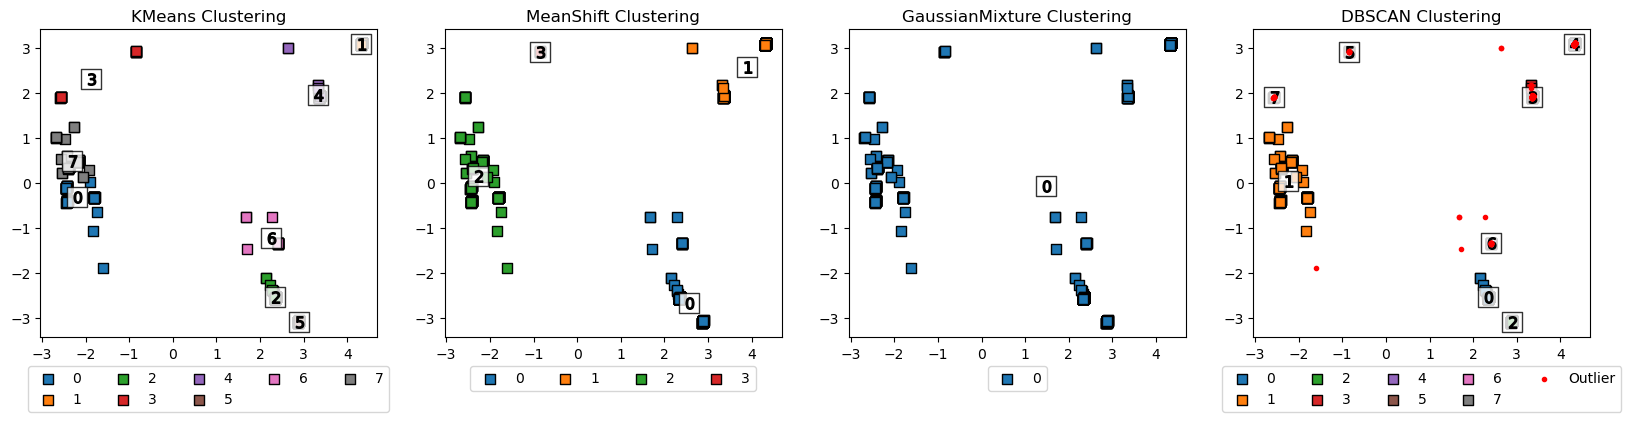

In [43]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

kmeans = KMeans()
kmeans.fit(X_train)

meanshift = MeanShift()
meanshift.fit(X_train)

gmm = GaussianMixture()
gmm.fit(X_train)

dbscan = DBSCAN()
dbscan.fit(X_train)

fig, axs = plt.subplots(1, 4, figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
show_cluster(kmeans, X_train, 'KMeans Clustering', ax=axs[0], show_all=True)
show_cluster(meanshift, X_train, 'MeanShift Clustering', ax=axs[1], show_all=True)
show_cluster(gmm, X_train, 'GaussianMixture Clustering', ax=axs[2], label_=False)
show_cluster(dbscan, X_train, 'DBSCAN Clustering', ax=axs[3], show_all = True)

<h3>Silouette Function</h3>

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def show_silhouette(model, X_, model_name, var, ax1, ax2, label_ = True, show_all = True):
    
    if label_:
        df = X_.copy()
        lab = model.labels_
        df['cluster'] = lab
    else:
        df = X_.copy()
        lab = model.predict(X_)
        df['cluster'] = lab
        
    #get unique cluster labels
    unique_clusters = np.unique(lab)
    unique_clusters = np.sort(np.setdiff1d(unique_clusters, [-1]))
    n_clusters = len(unique_clusters)

   
    print('\nSilhouette Coef for each cluster:')
    df['silhouette_coef'] = silhouette_samples(X_, lab)
    print(df.groupby('cluster')['silhouette_coef'].mean())

    #silhouette score for each data without outliers
    df_tmp = df.copy()
    df_tmp.drop(df_tmp[df_tmp['cluster']==-1].index, axis=0, inplace=True)
    sample_silhouette_values = silhouette_samples(df_tmp.drop(['cluster'], axis=1), df_tmp['cluster'])
    
    silhouette_avg = silhouette_score(df_tmp.drop(['cluster'], axis=1), df_tmp['cluster'])
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_tmp) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[df_tmp['cluster'] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax1.text(0.05, y_lower + 0.5*size_cluster_i, np.round(df_tmp[df_tmp['cluster']==i]['silhouette_coef'].mean(), 3))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # mean of silhouette scores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.text(silhouette_avg - 0.03, 50, np.round(silhouette_avg, 3), color='red', bbox={'facecolor':'white', 'alpha':1, 'pad':5})

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    
    markers = ['^', 's', '*', 'D', '+', '1']
    
    #get centers for each cluster
    centers = []
    for i in range(len(np.unique(df['cluster']))):
        centers.append([np.mean(df[df['cluster'] == i]['1st Feature']), np.mean(df[df['cluster'] == i]['2nd Feature'])])

    #scatter data
    for i in np.unique(df['cluster']):
        if show_all:
            flag = (i >= 0)
        else:
            flag = (i >=0) and (i <= 2)

        if flag:
            x = df[df['cluster']==i].iloc[:,0]
            y = df[df['cluster']==i].iloc[:,1]
            ax2.scatter(x, y, marker='s', edgecolor='k', s=50)

            center = centers[i]
            ax2.scatter(center[0], center[1], s=200, color='white', alpha=0.8, edgecolor='k', marker='s')
            ax2.scatter(center[0], center[1], s=70, color='k', edgecolor='k', marker='$%d$' % i)

    #Outlier
    show_legend = False
    if not show_all:
        if df[(df['cluster']==-1) | (df['cluster']>=3)].shape[0] >= 1:
            x = df[(df['cluster']==-1) | (df['cluster']>=3)].iloc[:,0]
            y = df[(df['cluster']==-1) | (df['cluster']>=3)].iloc[:,1]
            ax2.scatter(x, y, marker='.', label='Outlier', color='r')
            show_legend = True  
    else:
        if df[(df['cluster']==-1)].shape[0] >= 1:
            x = df[(df['cluster']==-1) | (df['cluster']>=3)].iloc[:,0]
            y = df[(df['cluster']==-1) | (df['cluster']>=3)].iloc[:,1]
            ax2.scatter(x, y, marker='.', label='Outlier', color='r')
            show_legend = True

    ax2.set_xlabel("1st Feature")
    ax2.set_ylabel("2nd Feature")
    if show_legend:
        ax2.legend(loc='lower left')

    plt.suptitle(
        "Silhouette analysis for %s clustering"
        % (model_name),
        fontsize=20,
        fontweight="bold",
    )
    
    ax1.set_title(var, fontsize=14, fontweight='bold')

<h3>Parameter Tuning</h3>

<h3>KMeans</h3>

C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.839686
1    0.497343
Name: silhouette_coef, dtype: float64
For n_clusters = 2 The average silhouette_score is : 0.6053282348659296


C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.822569
1    0.881899
2    0.850913
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8528273504137929


C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.817231
1    0.861307
2    0.984002
3    0.927994
Name: silhouette_coef, dtype: float64
For n_clusters = 4 The average silhouette_score is : 0.876784080024269


C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.730163
1    0.861307
2    0.984002
3    0.927994
4    0.995720
Name: silhouette_coef, dtype: float64
For n_clusters = 5 The average silhouette_score is : 0.8528142035289558


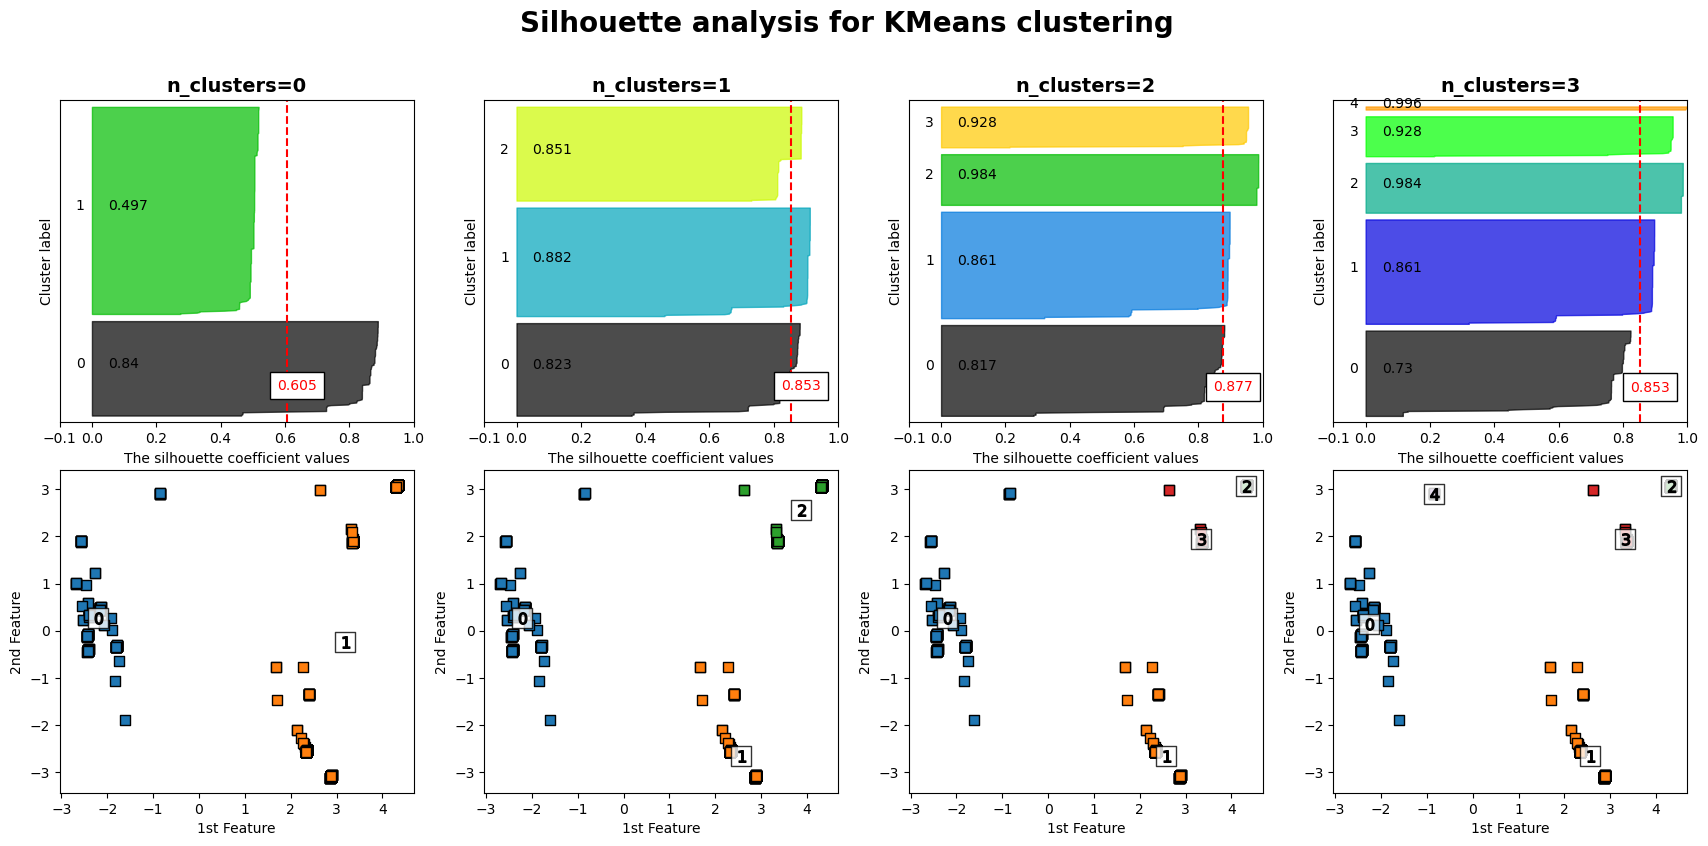

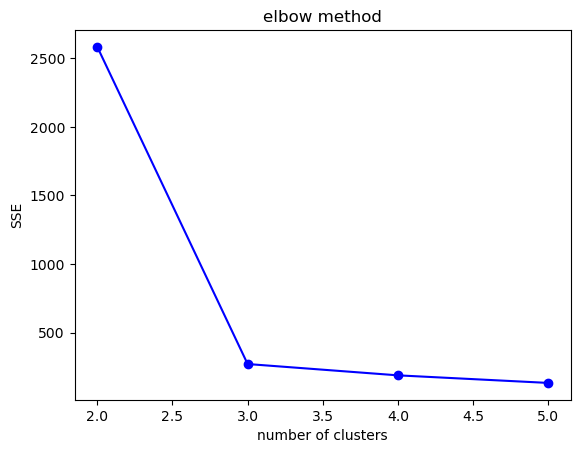

In [45]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(2, 4, figsize=(21, 9))
fig.subplots_adjust(hspace=0.15)

sse = []
for i, n_ in enumerate(range(2, 6)):
    kmeans = KMeans(n_clusters=n_, max_iter=50000, n_init='auto', random_state = 511)
    kmeans.fit(X_train)
    show_silhouette(kmeans, X_train, 'KMeans', 'n_clusters=%d'%i, ax[0][i], ax[1][i])
    sse.append(kmeans.inertia_)
    
plt.show()
plt.plot(range(2, 6), sse, 'bo-')
plt.title("elbow method")
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()

<h3>MeanShift</h3>


Silhouette Coef for each cluster:
cluster
0     0.983944
1     0.922716
2     0.974872
3     0.676269
4     0.970193
5     0.692108
6     0.915084
7     0.983158
8     0.363150
9     0.989734
10    0.993249
11    1.000000
12    1.000000
13    0.081050
14    0.000000
15    0.000000
16    0.000000
Name: silhouette_coef, dtype: float64
For n_clusters = 17 The average silhouette_score is : 0.8731253537773395

Silhouette Coef for each cluster:
cluster
0    0.730106
1    0.729819
2    0.983944
3    0.970193
4    0.655574
5    0.995720
6    1.000000
Name: silhouette_coef, dtype: float64
For n_clusters = 7 The average silhouette_score is : 0.8087250726798522

Silhouette Coef for each cluster:
cluster
0    0.861307
1    0.730163
2    0.984002
3    0.927994
4    0.995720
Name: silhouette_coef, dtype: float64
For n_clusters = 5 The average silhouette_score is : 0.8528142035289558

Silhouette Coef for each cluster:
cluster
0    0.881899
1    0.850913
2    0.822569
Name: silhouette_coef, dtype: fl

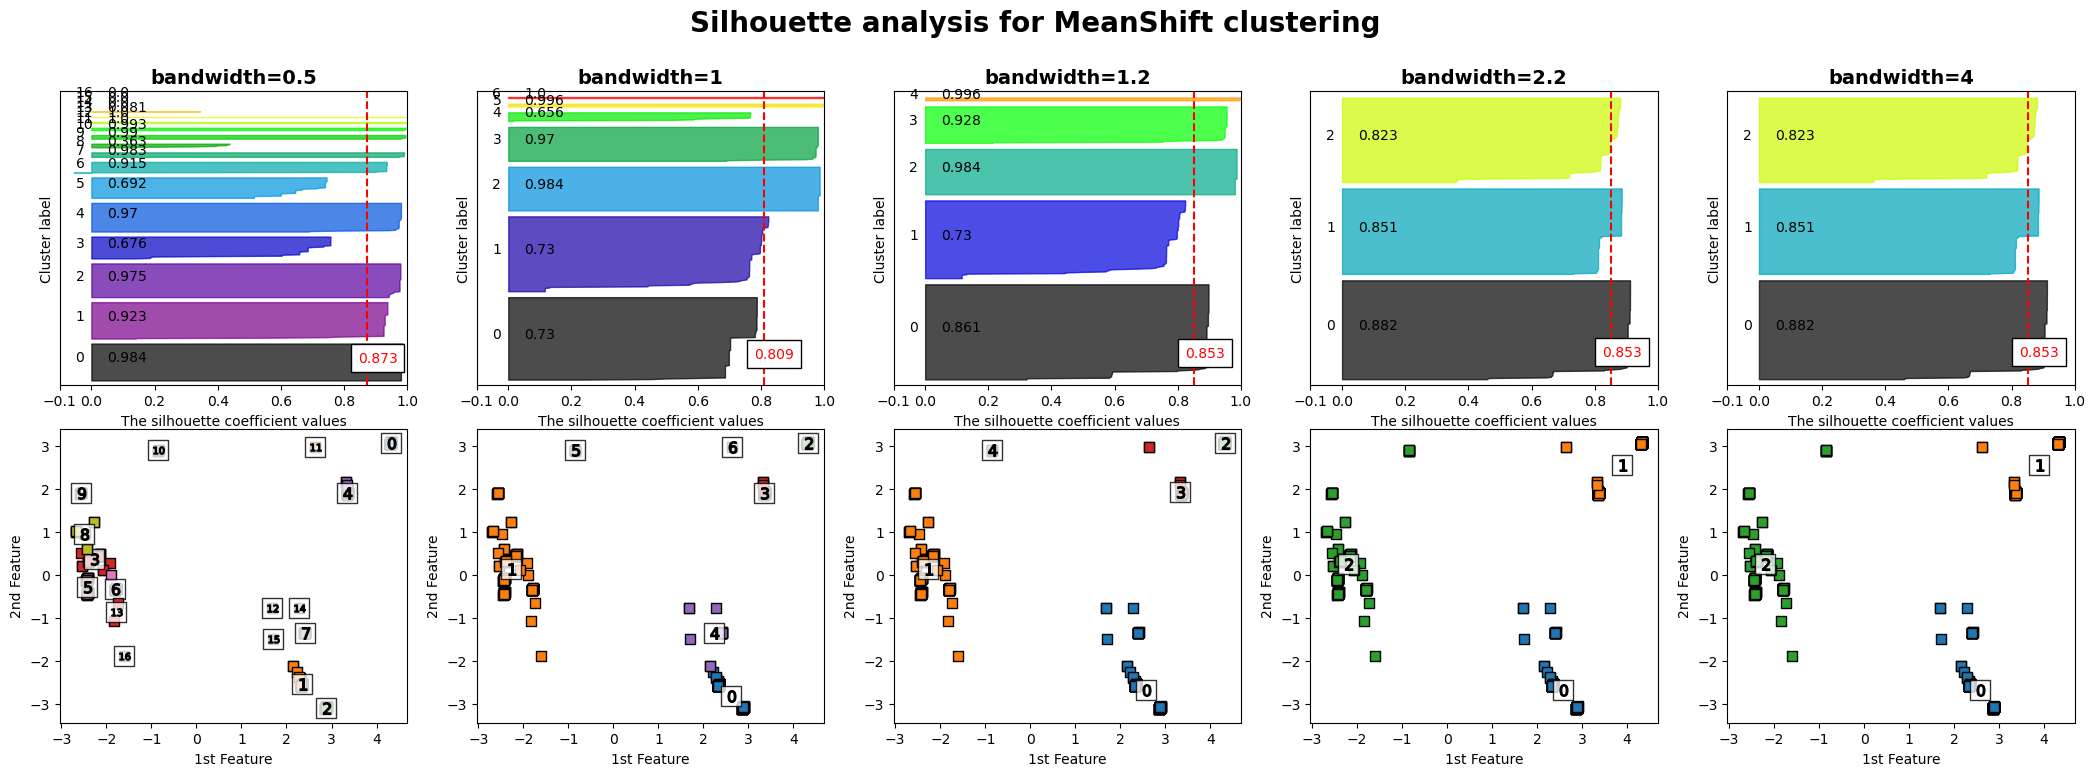


Silhouette Coef for each cluster:
cluster
0    0.861307
1    0.730163
2    0.984002
3    0.927994
4    0.995720
Name: silhouette_coef, dtype: float64
For n_clusters = 5 The average silhouette_score is : 0.8528142035289558

Silhouette Coef for each cluster:
cluster
0    0.881837
1    0.831872
2    0.730163
3    0.995720
Name: silhouette_coef, dtype: float64
For n_clusters = 4 The average silhouette_score is : 0.8210799918450812

Silhouette Coef for each cluster:
cluster
0    0.881837
1    0.831872
2    0.730163
3    0.995720
Name: silhouette_coef, dtype: float64
For n_clusters = 4 The average silhouette_score is : 0.8210799918450812

Silhouette Coef for each cluster:
cluster
0    0.881837
1    0.831872
2    0.730163
3    0.995720
Name: silhouette_coef, dtype: float64
For n_clusters = 4 The average silhouette_score is : 0.8210799918450812

Silhouette Coef for each cluster:
cluster
0    0.881899
1    0.850913
2    0.822569
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The aver

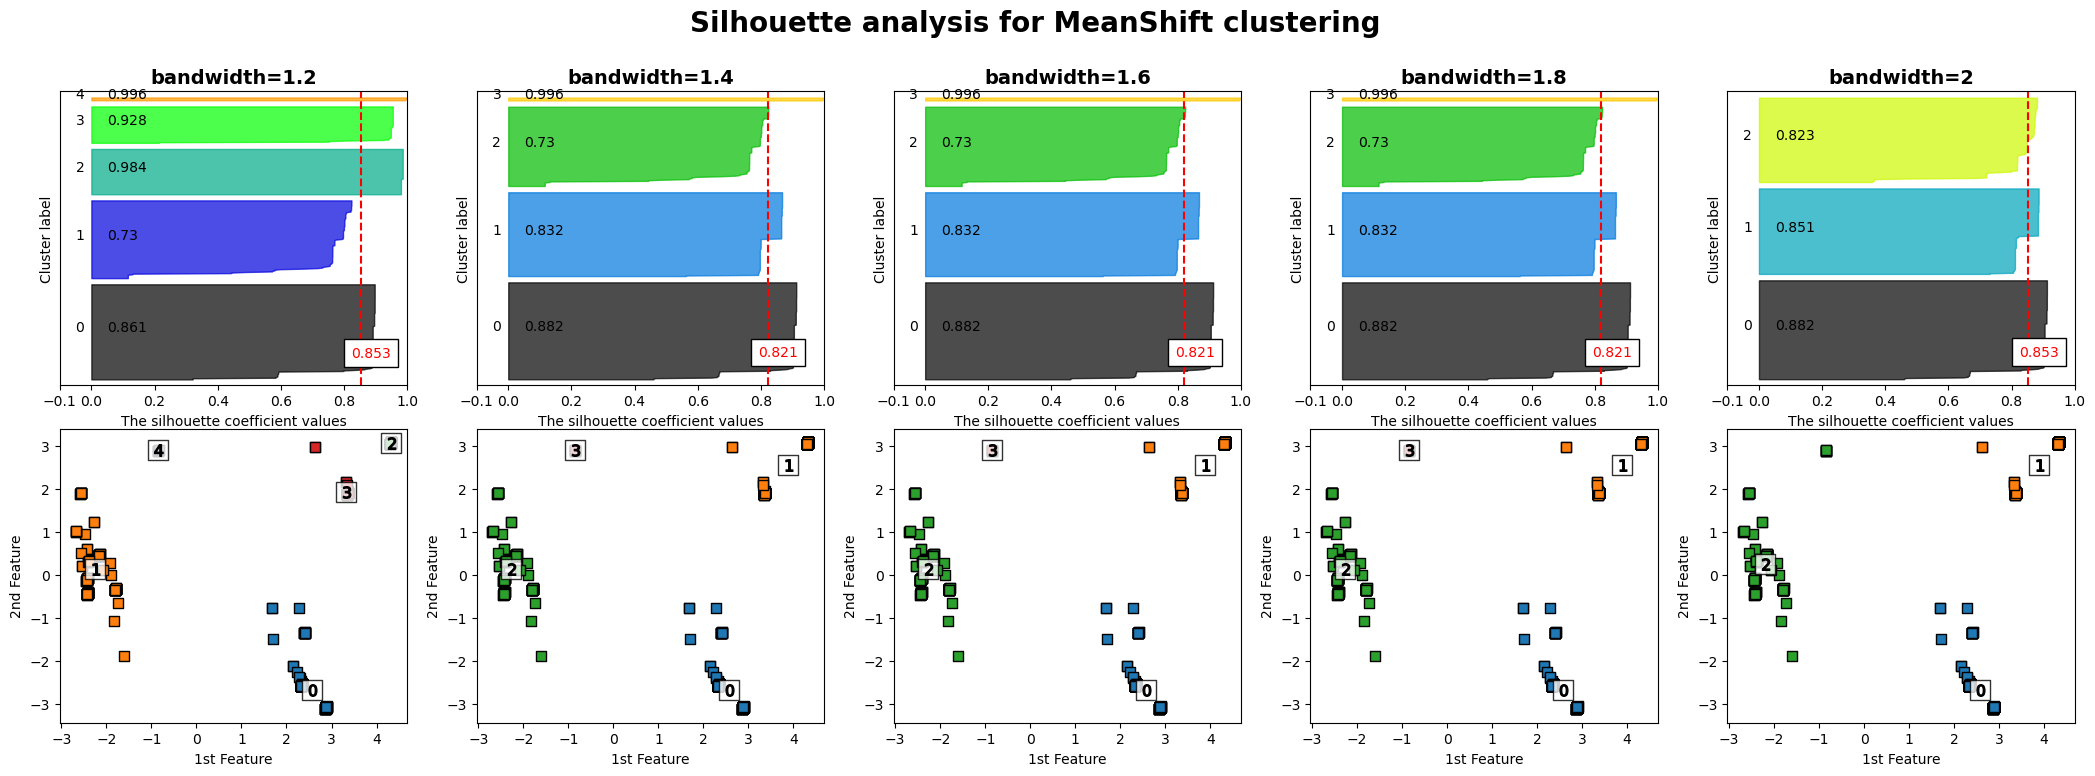

In [46]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

fig, ax = plt.subplots(2, 5, figsize=(26, 8.2))
fig.subplots_adjust(hspace=0.15)

for i, bw in enumerate([0.5, 1, 1.2, 2.2, 4]):
    meanshift = MeanShift(bandwidth=bw, cluster_all=False)
    meanshift.fit(X_train)
    show_silhouette(meanshift, X_train, 'MeanShift', 'bandwidth=' + str(bw), ax[0][i], ax[1][i], label_=False)
    
plt.show()

fig, ax = plt.subplots(2, 5, figsize=(26, 8.2))
fig.subplots_adjust(hspace=0.15)
for i, bw in enumerate([1.2, 1.4, 1.6, 1.8, 2]):
    meanshift = MeanShift(bandwidth=bw, cluster_all=False)
    meanshift.fit(X_train)
    show_silhouette(meanshift, X_train, 'MeanShift', 'bandwidth=' + str(bw), ax[0][i], ax[1][i], label_=False)
    
plt.show()

<h3>GaussianMixture</h3>

train set의 kdeplot

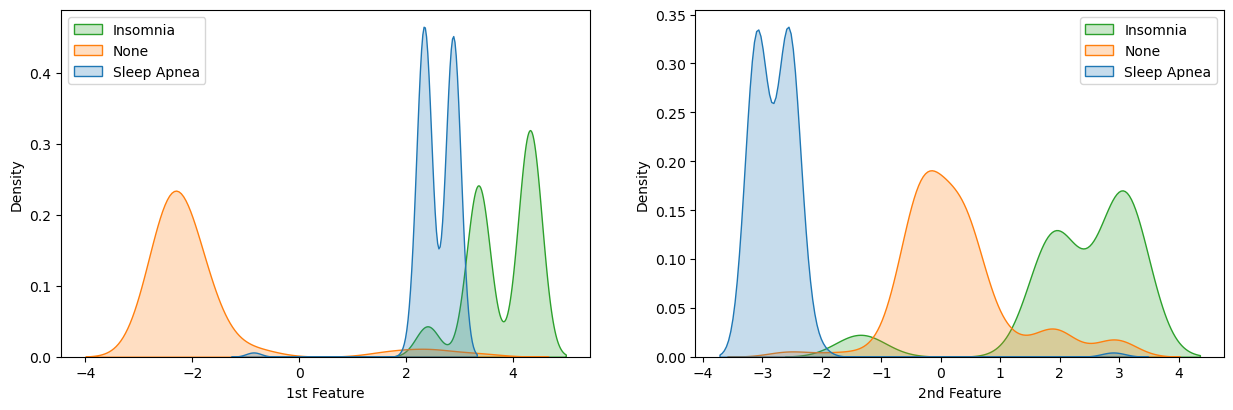

In [47]:
df_ = X_train.copy()
df_['label'] = answer.inverse_transform(y_train)

fig, axs = plt.subplots(1, 2, figsize=(15, 4.5))
sns.kdeplot(x='1st Feature', data=df_, hue='label',fill=True, ax=axs[0])
axs[0].legend(labels=answer.inverse_transform([0,1,2]), loc='upper left')
sns.kdeplot(x='2nd Feature', data=df_, hue='label',fill=True, ax=axs[1])
axs[1].legend(labels=answer.inverse_transform([0,1,2]), loc='upper right')

plt.show()

C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.867228
1    0.428020
Name: silhouette_coef, dtype: float64
For n_clusters = 2 The average silhouette_score is : 0.5651615464333972


C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.850913
1    0.822569
2    0.881899
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8528273504137929


C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.984002
1    0.817231
2    0.861307
3    0.927994
Name: silhouette_coef, dtype: float64
For n_clusters = 4 The average silhouette_score is : 0.876784080024269


C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.984002
1    0.728159
2    0.861307
3    0.927994
4    0.572110
Name: silhouette_coef, dtype: float64
For n_clusters = 5 The average silhouette_score is : 0.8425850717224387


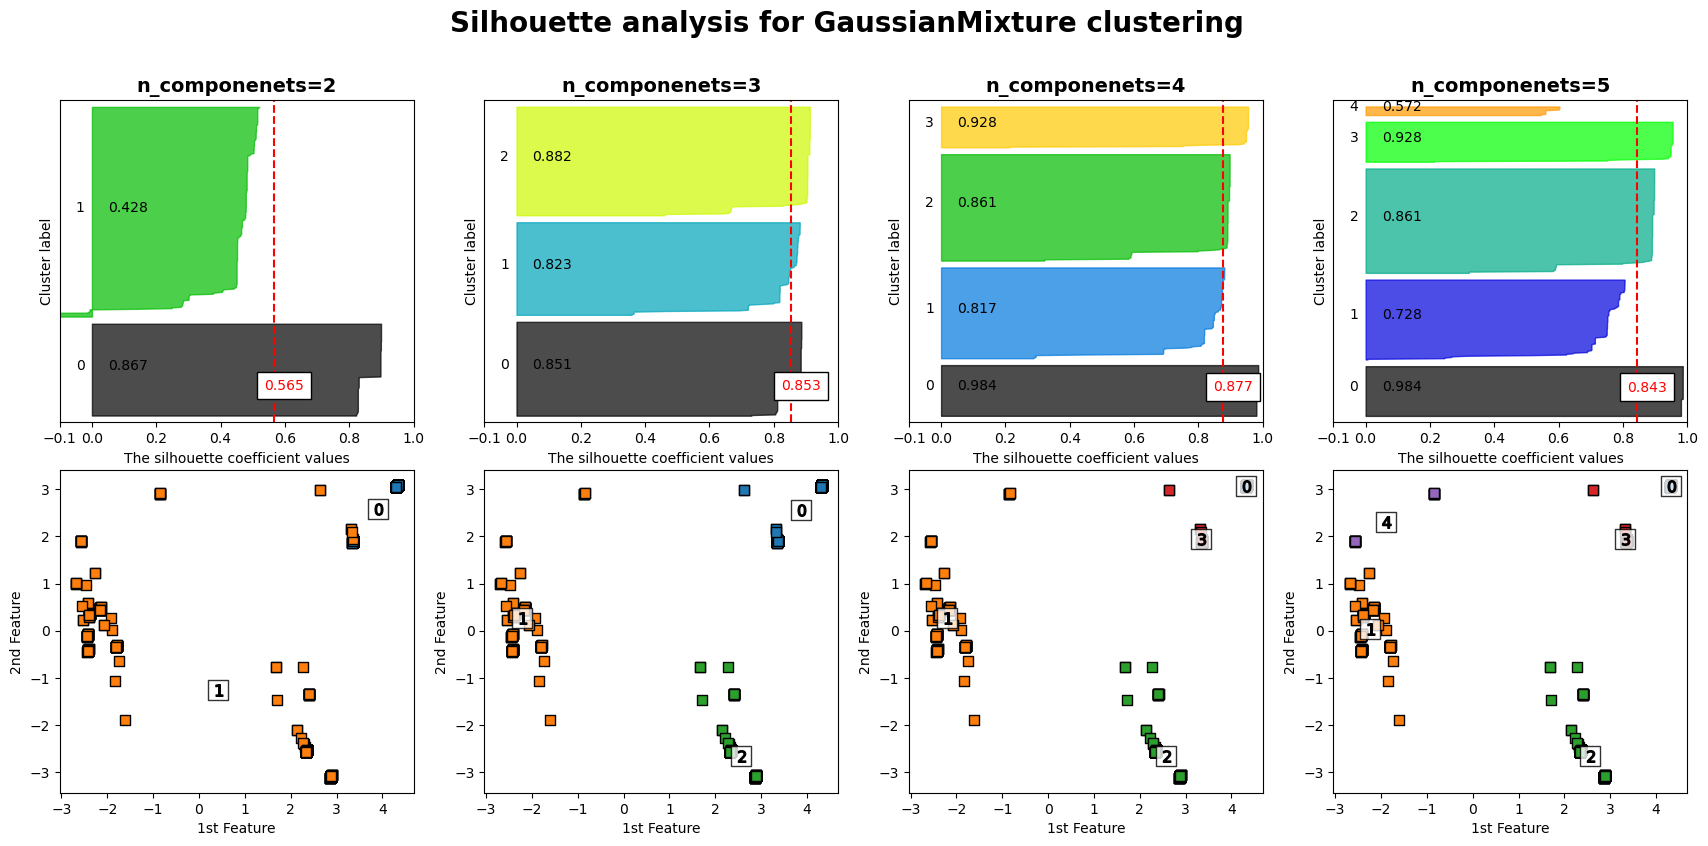

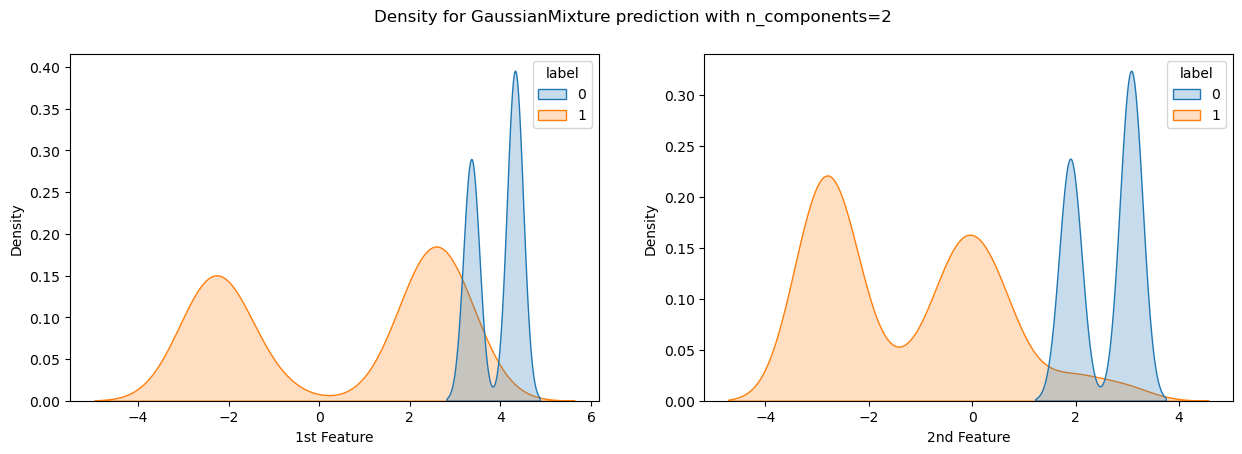

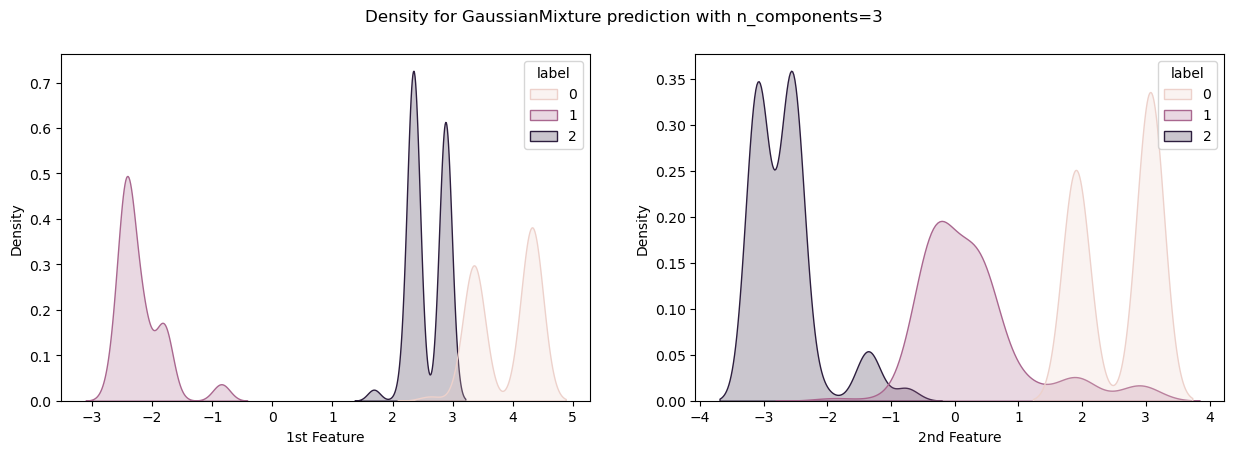

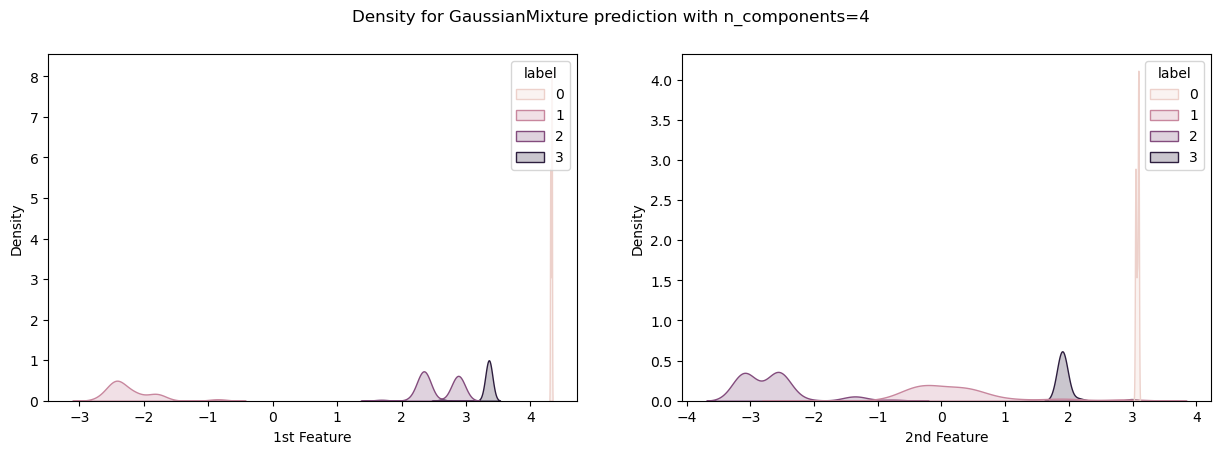

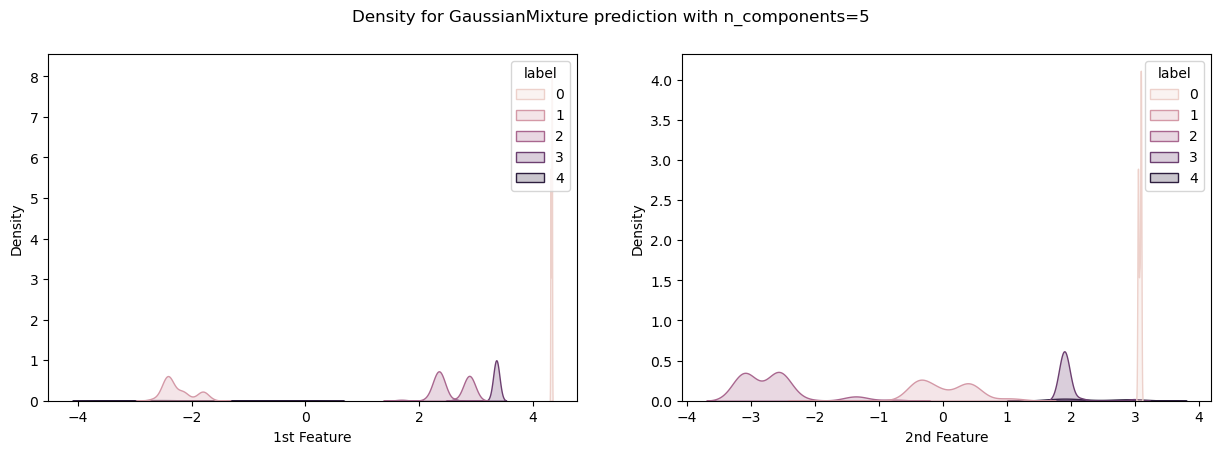

In [48]:
from sklearn.mixture import GaussianMixture

fig, ax = plt.subplots(2, 4, figsize=(21, 9))
fig.subplots_adjust(hspace=0.15)

gmms = []

for i, n_ in enumerate([2, 3, 4, 5]):
    gmm = GaussianMixture(n_components=n_, random_state=21)
    gmm.fit(X_train)
    show_silhouette(gmm, X_train, 'GaussianMixture', 'n_componenets=' + str(n_), ax[0][i], ax[1][i], label_=False)
    gmms.append([gmm, n_])

plt.show()

for model, n_ in gmms:
    df_ = X_train.copy()
    df_['label'] = model.predict(X_train)
    fig, axs = plt.subplots(1, 2, figsize=(15, 4.5))
    sns.kdeplot(x='1st Feature', data=df_, hue='label',fill=True, ax=axs[0])
    sns.kdeplot(x='2nd Feature', data=df_, hue='label',fill=True, ax=axs[1])
    fig.suptitle('Density for GaussianMixture prediction with n_components=%d'%n_)
    plt.show()

<h3>DBSCAN</h3>

In [49]:
from sklearn.neighbors import NearestNeighbors

dst = []
for k in range(2, 300):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_train)
    distances, indices = nbrs.kneighbors(X_train)
    dst.append(np.mean(distances[:, -1]))

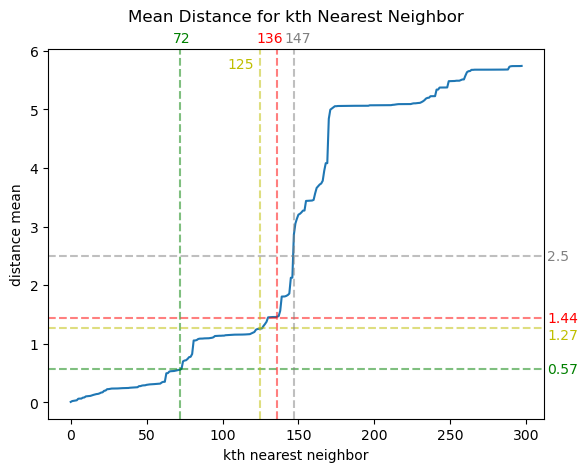

In [50]:
plt.plot(np.sort(dst))
plt.xlabel('kth nearest neighbor')
plt.ylabel('distance mean')
#plt.vxline(50)
px, py = 72, 0.57
plt.axvline(x=px, color='g', alpha=0.5, linestyle='--')
plt.axhline(y=py, color='g', alpha=0.5, linestyle='--')
plt.text(72-5,6.15, px, color='g')
plt.text(314,0.57-0.08, py, color='g')

px, py = 136, 1.44
plt.axvline(x=px, color='r', alpha=0.5, linestyle='--')
plt.axhline(y=py, color='r', alpha=0.5, linestyle='--')
plt.text(px-13.5,6.15, px, color='r')
plt.text(314,py-0.08, py, color='r')

px, py = 125, 1.27
plt.axvline(x=px, color='y', alpha=0.5, linestyle='--')
plt.axhline(y=py, color='y', alpha=0.5, linestyle='--')
plt.text(px-22,5.7, px, color='y')
plt.text(314,py-0.2, py, color='y')

px, py = 147, 2.5
plt.axvline(x=px, color='gray', alpha=0.5, linestyle='--')
plt.axhline(y=py, color='gray', alpha=0.5, linestyle='--')
plt.text(px-6,6.15, px, color='gray')
plt.text(314,py-0.08, py, color='gray')

plt.title('Mean Distance for kth Nearest Neighbor', pad=20)
plt.show()


Silhouette Coef for each cluster:
cluster
-1   -0.557132
 0    0.929010
 1    0.974872
 2    0.993984
 3    0.875452
Name: silhouette_coef, dtype: float64
For n_clusters = 4 The average silhouette_score is : 0.9453892726665835

Silhouette Coef for each cluster:
cluster
-1    0.606049
 0    0.894294
 1    0.889537
Name: silhouette_coef, dtype: float64
For n_clusters = 2 The average silhouette_score is : 0.8942238103583523

Silhouette Coef for each cluster:
cluster
-1    0.300224
 0    0.881887
 1    0.846853
 2    0.721161
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8661779337994422

Silhouette Coef for each cluster:
cluster
-1    0.822569
 0    0.881899
 1    0.850913
Name: silhouette_coef, dtype: float64
For n_clusters = 2 The average silhouette_score is : 0.8670867806178316


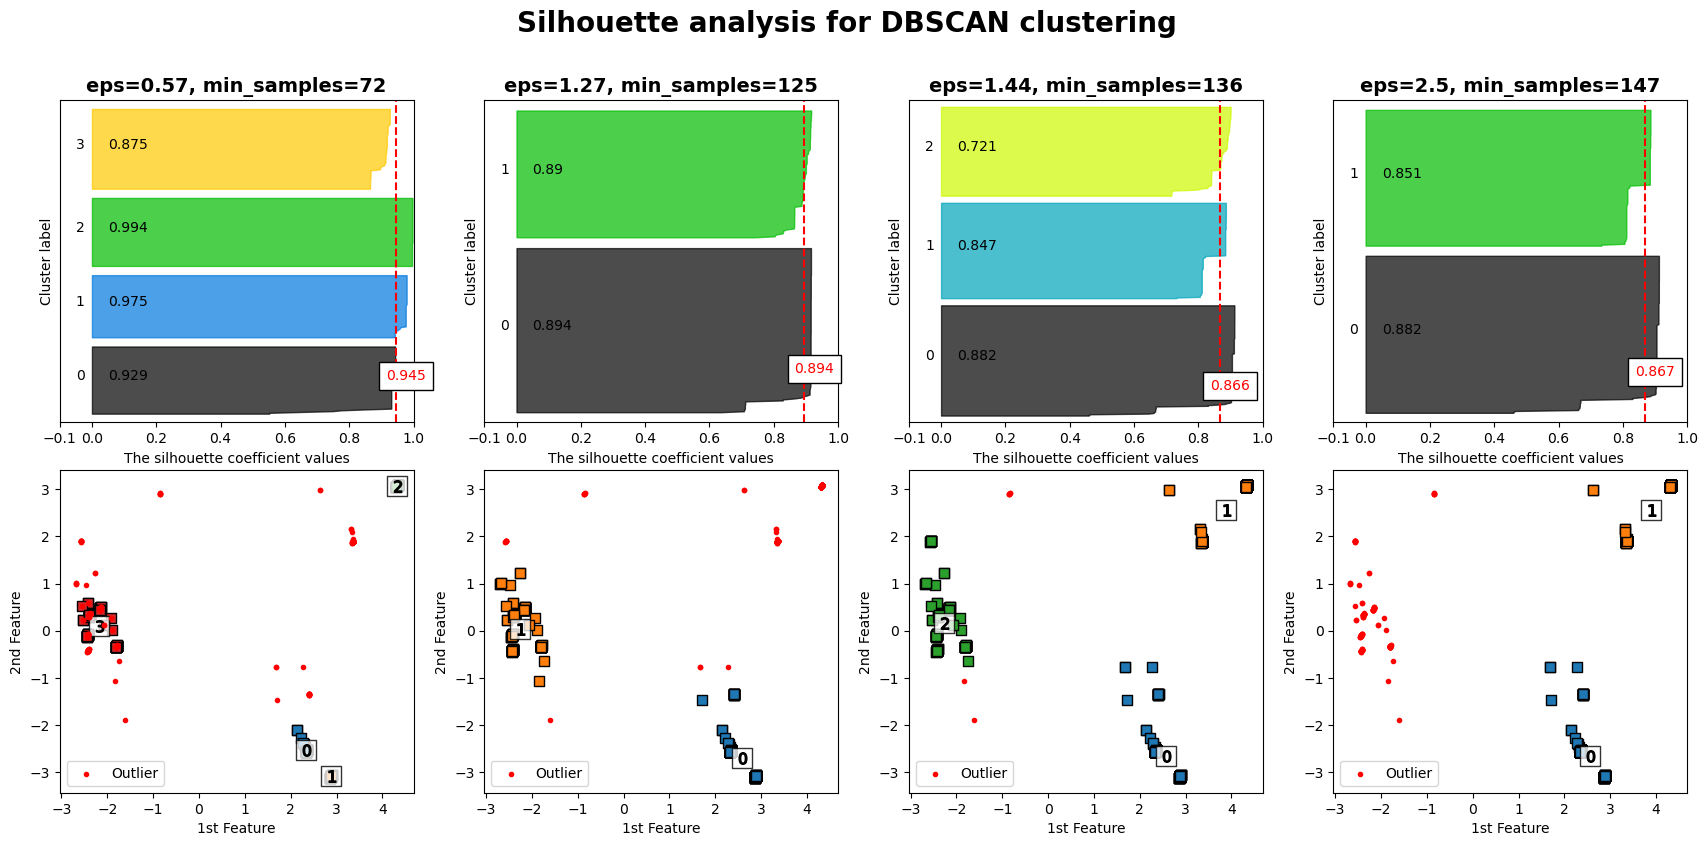

In [51]:
fig, ax = plt.subplots(2, 4, figsize=(21, 9))
fig.subplots_adjust(hspace=0.15)

dbscan = DBSCAN(eps=0.57, min_samples = 72)
dbscan.fit(X_train)
show_silhouette(dbscan, X_train, 'DBSCAN', 'eps=0.57, min_samples=72', ax[0][0], ax[1][0])


dbscan = DBSCAN(eps=1.27, min_samples = 125)
dbscan.fit(X_train)
show_silhouette(dbscan, X_train, 'DBSCAN', 'eps=1.27, min_samples=125', ax[0][1], ax[1][1])

dbscan = DBSCAN(eps=1.44, min_samples = 136)
dbscan.fit(X_train)
show_silhouette(dbscan, X_train, 'DBSCAN', 'eps=1.44, min_samples=136', ax[0][2], ax[1][2])

dbscan = DBSCAN(eps=2.5, min_samples = 147)
dbscan.fit(X_train)
show_silhouette(dbscan, X_train, 'DBSCAN', 'eps=2.5, min_samples=147', ax[0][3], ax[1][3])

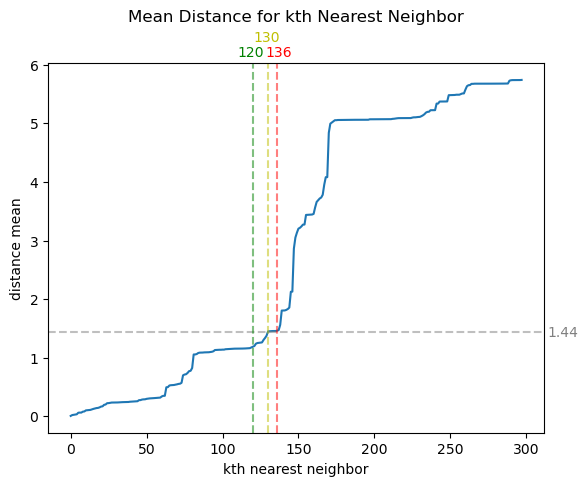

In [52]:
plt.plot(np.sort(dst))
plt.xlabel('kth nearest neighbor')
plt.ylabel('distance mean')

py = 1.44
plt.axhline(y=py, color='gray', alpha=0.5, linestyle='--')
plt.text(314,py-0.08, py, color='gray')

px = 120
plt.axvline(x=px, color='g', alpha=0.5, linestyle='--')
plt.text(px-10,6.15, px, color='g')

px = 130
plt.axvline(x=px, color='y', alpha=0.5, linestyle='--')
plt.text(px-9.5,6.4, px, color='y')

px = 136
plt.axvline(x=px, color='r', alpha=0.5, linestyle='--')
plt.text(px-8,6.15, px, color='r')

plt.title('Mean Distance for kth Nearest Neighbor', pad=30)
plt.show()


Silhouette Coef for each cluster:
cluster
-1    0.995720
 0    0.881837
 1    0.730163
 2    0.831872
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8638920418034258

Silhouette Coef for each cluster:
cluster
-1    0.553257
 0    0.881866
 1    0.732972
 2    0.842695
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8655308798036321

Silhouette Coef for each cluster:
cluster
-1    0.300224
 0    0.881887
 1    0.846853
 2    0.721161
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8661779337994422


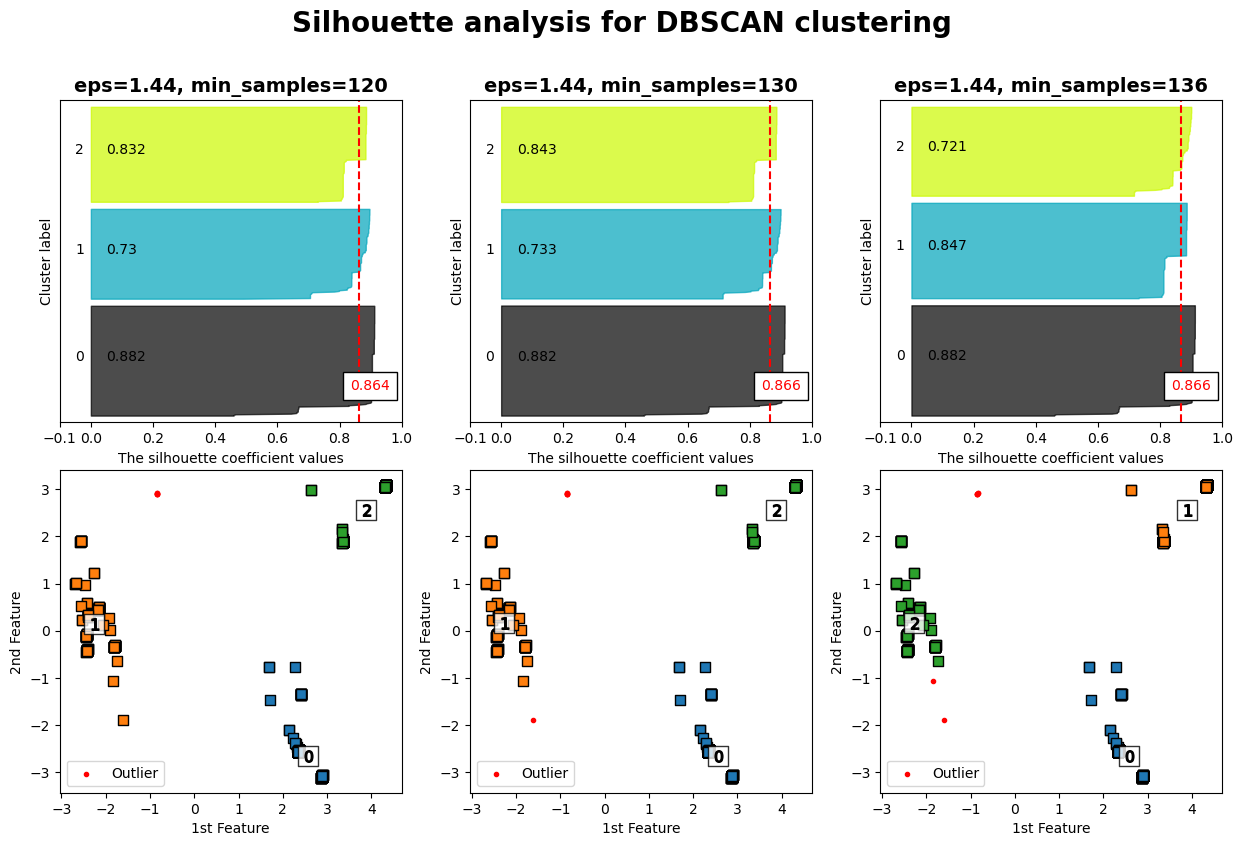

In [53]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
fig.subplots_adjust(hspace=0.15)

dbscan = DBSCAN(eps=1.44, min_samples = 120)
dbscan.fit(X_train)
show_silhouette(dbscan, X_train, 'DBSCAN', 'eps=1.44, min_samples=120', ax[0][0], ax[1][0])

dbscan = DBSCAN(eps=1.44, min_samples = 130)
dbscan.fit(X_train)
show_silhouette(dbscan, X_train, 'DBSCAN', 'eps=1.44, min_samples=130', ax[0][1], ax[1][1])

dbscan = DBSCAN(eps=1.44, min_samples = 136)
dbscan.fit(X_train)
show_silhouette(dbscan, X_train, 'DBSCAN', 'eps=1.44, min_samples=136', ax[0][2], ax[1][2])

<h3>파라미터 튜닝 후 모델</h3>

C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Silhouette Coef for each cluster:
cluster
0    0.822569
1    0.881899
2    0.850913
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8528273504137929

Silhouette Coef for each cluster:
cluster
0    0.881899
1    0.850913
2    0.822569
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8528273504137929

Silhouette Coef for each cluster:
cluster
0    0.850913
1    0.822569
2    0.881899
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8528273504137929

Silhouette Coef for each cluster:
cluster
-1    0.995720
 0    0.881837
 1    0.730163
 2    0.831872
Name: silhouette_coef, dtype: float64
For n_clusters = 3 The average silhouette_score is : 0.8638920418034258


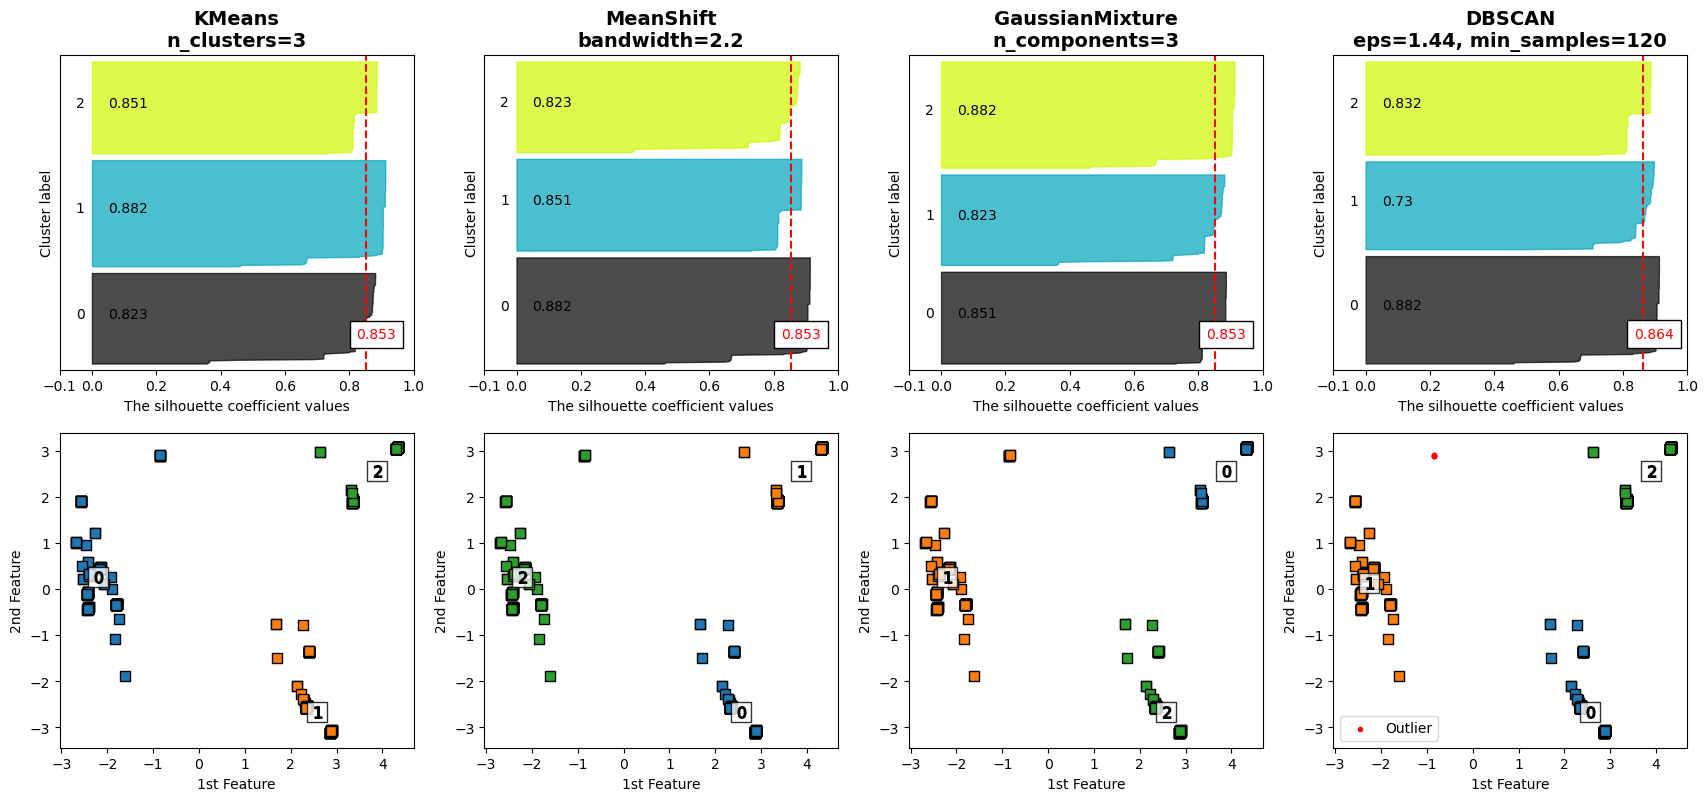

In [54]:
best_kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 511)
best_kmeans.fit(X_train)

best_meanshift = MeanShift(bandwidth=2.2)
best_meanshift.fit(X_train)

best_gmm = GaussianMixture(n_components=3, random_state=21)
best_gmm.fit(X_train)

best_dbscan = DBSCAN(eps=1.44, min_samples = 120)
best_dbscan.fit(X_train)

fig, ax = plt.subplots(2, 4, figsize=(21, 9))
show_silhouette(best_kmeans, X_train, 'KMeans', 'KMeans\nn_clusters=3', ax[0][0], ax[1][0])
show_silhouette(best_meanshift, X_train, 'MeanShift', 'MeanShift\nbandwidth=2.2', ax[0][1], ax[1][1])
show_silhouette(best_gmm, X_train, 'GaussianMixture', 'GaussianMixture\nn_components=3', ax[0][2], ax[1][2], label_=False)
show_silhouette(best_dbscan, X_train, 'DBSCAN', 'DBSCAN\neps=1.44, min_samples=120', ax[0][3], ax[1][3])
plt.suptitle('')
plt.show()

<h3>Accuracy, Precision, Recall score</h3>

In [55]:
#평가
def evaluate(y_train, y_test, y_train_hat, y_test_hat):
    print('Accuracy Score of Train Set:',accuracy_score(y_train, y_train_hat))
    print('Accuracy Score of Test Set :',accuracy_score(y_test, y_test_hat))
    print()

#confusion_matrix
def show_confusion_matrix(y_test, y_test_hat, show_=False):
    df = pd.DataFrame(columns=['y_', 'y_hat'])
    df['y_'] = y_test; df['y_hat'] = y_test_hat
    df.drop(df[df['y_hat'] == -1].index, axis=0, inplace=True)
    
    p = precision_score(df['y_'], df['y_hat'], average=None)
    print('Precision Score')
    for i in range(3):
        print(answer.inverse_transform([i])[0], ':', p[i])
    print()
    r = recall_score(df['y_'], df['y_hat'], average=None)
    print('Recall Score:')
    for i in range(3):
        print(answer.inverse_transform([i])[0], ':', r[i])
    
    if show_:
        conf_matrix = confusion_matrix(df['y_'], df['y_hat'])
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

-- KMeans --
Accuracy Score of Train Set: 0.9526881720430107
Accuracy Score of Test Set : 0.9523809523809523

Precision Score
Insomnia : 1.0
None : 1.0
Sleep Apnea : 0.8

Recall Score:
Insomnia : 0.9166666666666666
None : 0.9487179487179487
Sleep Apnea : 1.0


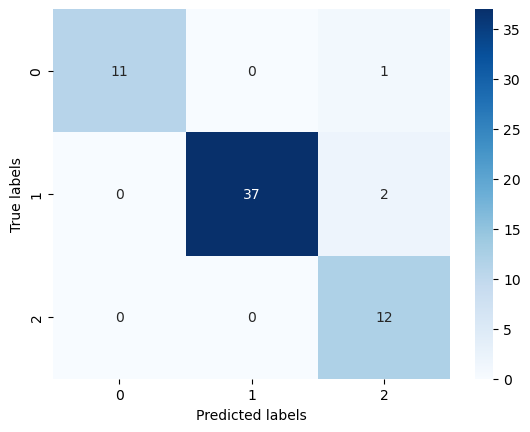

-- MeanShift --
Accuracy Score of Train Set: 0.9526881720430107
Accuracy Score of Test Set : 0.9523809523809523

Precision Score
Insomnia : 1.0
None : 1.0
Sleep Apnea : 0.8

Recall Score:
Insomnia : 0.9166666666666666
None : 0.9487179487179487
Sleep Apnea : 1.0


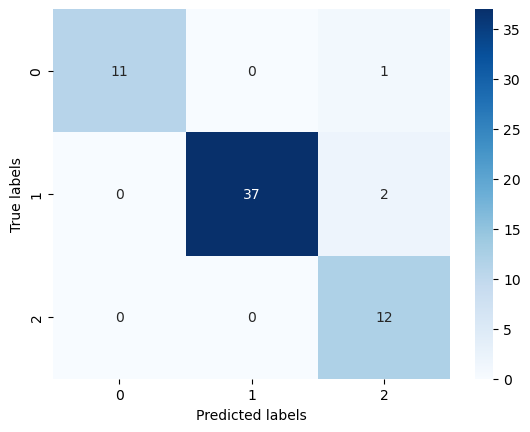

-- GaussianMixture --
Accuracy Score of Train Set: 0.9526881720430107
Accuracy Score of Test Set : 0.9523809523809523

Precision Score
Insomnia : 1.0
None : 1.0
Sleep Apnea : 0.8

Recall Score:
Insomnia : 0.9166666666666666
None : 0.9487179487179487
Sleep Apnea : 1.0


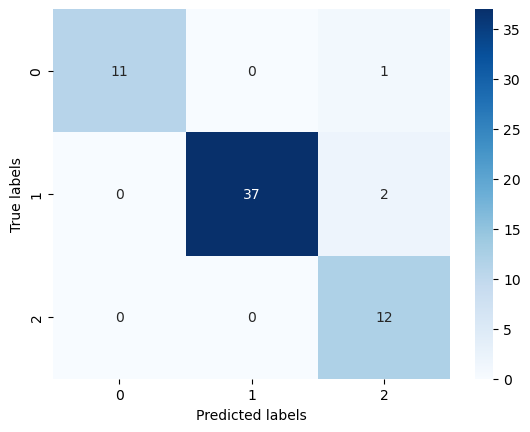

-- DBSCAN --
Accuracy Score of Train Set: 0.9419354838709677
Precision Score
Insomnia : 1.0
None : 1.0
Sleep Apnea : 0.8

Recall Score:
Insomnia : 0.9166666666666666
None : 0.9487179487179487
Sleep Apnea : 1.0


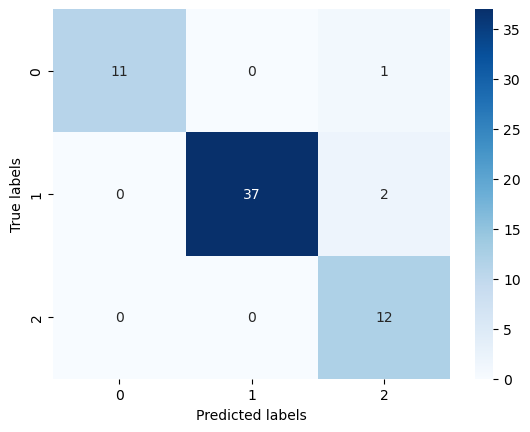

In [56]:
print('-- KMeans --')
y_train_hat, y_test_hat = get_yhats(best_kmeans, X_train, X_test, y_train, y_test)
evaluate(y_train, y_test, y_train_hat, y_test_hat)
show_confusion_matrix(y_test, y_test_hat, show_=True)

print('-- MeanShift --')
y_train_hat, y_test_hat = get_yhats(best_meanshift, X_train, X_test, y_train, y_test)
evaluate(y_train, y_test, y_train_hat, y_test_hat)
show_confusion_matrix(y_test, y_test_hat, show_=True)

print('-- GaussianMixture --')
y_train_hat, y_test_hat = get_yhats(best_gmm, X_train, X_test, y_train, y_test)
evaluate(y_train, y_test, y_train_hat, y_test_hat)
show_confusion_matrix(y_test, y_test_hat, show_=True)

print('-- DBSCAN --')
y_train_hat = best_dbscan.fit_predict(X_train)
y_train_hat = change_label(X_train, y_train_hat)
print('Accuracy Score of Train Set:',accuracy_score(y_train, y_train_hat))
show_confusion_matrix(y_test, y_test_hat, show_ = True)

<h3>예측 레이블 매핑 예시</h3>

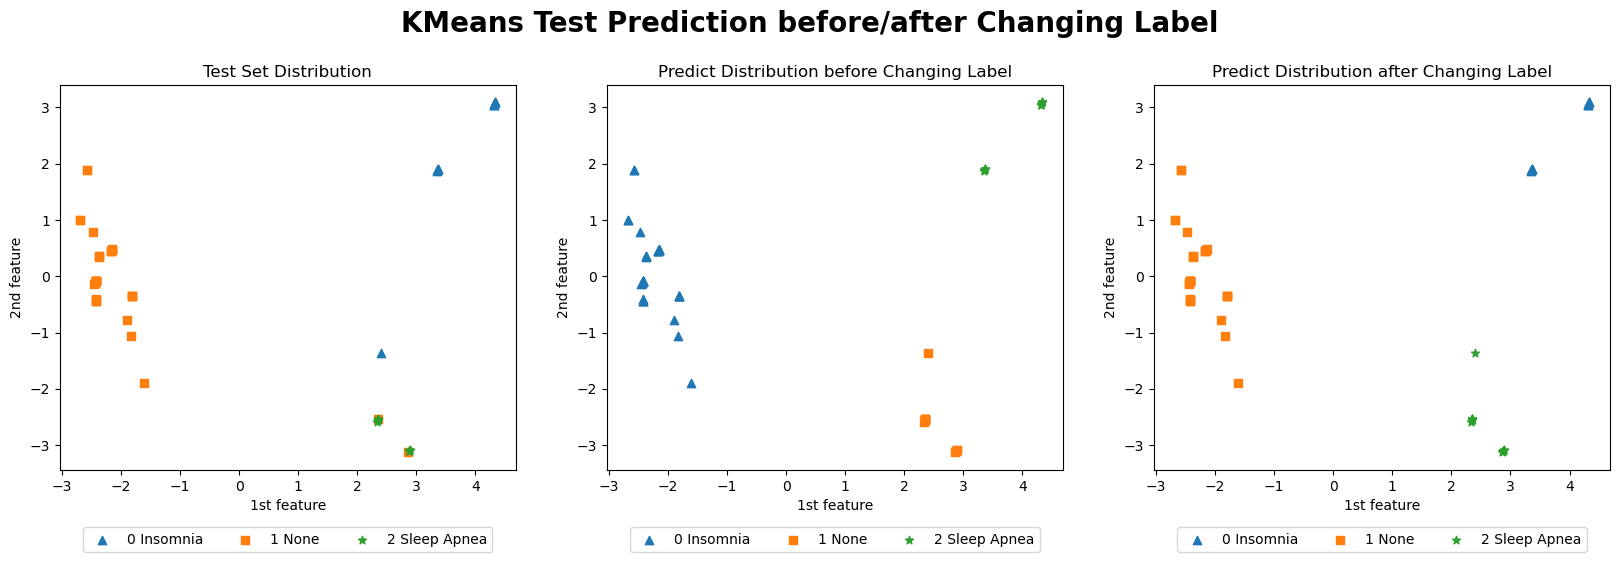

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

show_scatter(X_test, y_test, ax=axs[0], title='Test Set Distribution')

y_test_hat = best_kmeans.predict(X_test)
show_scatter(X_test, y_test_hat, ax=axs[1], title='Predict Distribution before Changing Label')

y_test_hat = change_label(X_test, y_test_hat)
show_scatter(X_test, y_test_hat, ax=axs[2], title='Predict Distribution after Changing Label')

fig.suptitle('KMeans Test Prediction before/after Changing Label', fontsize=20, fontweight="bold", y=1.03)
plt.show()

<h3>KMeans, GaussianMixture Comparison</h3>

C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kijun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


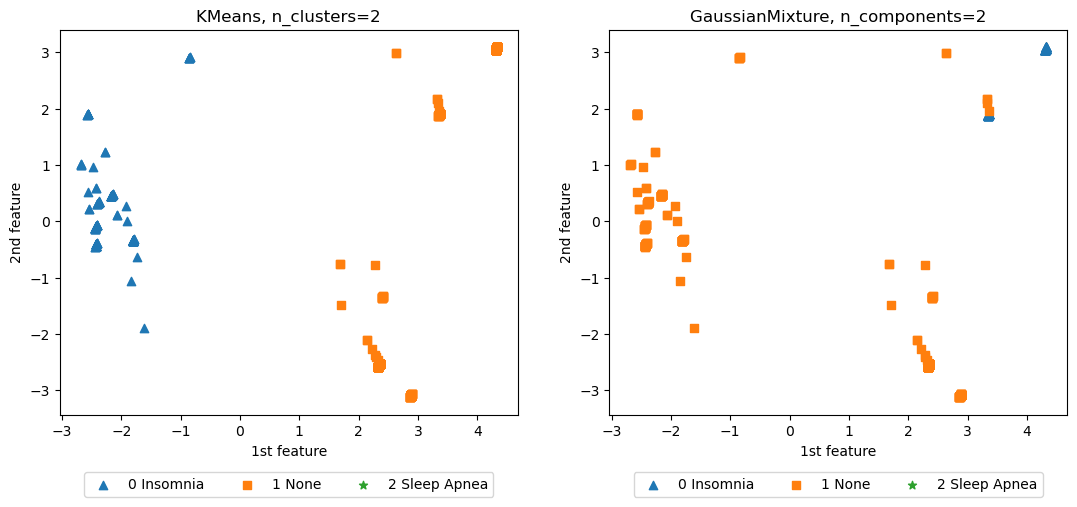

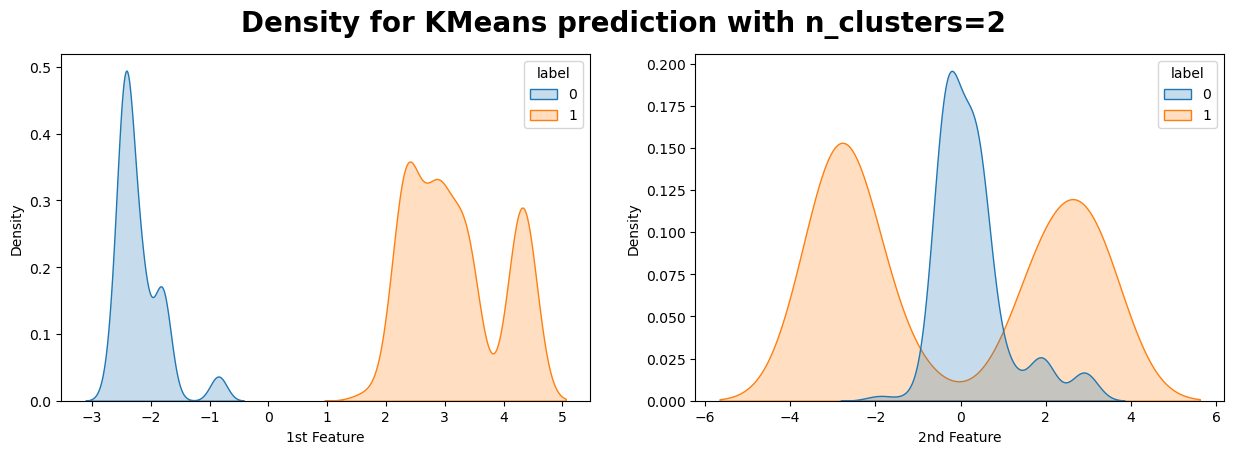

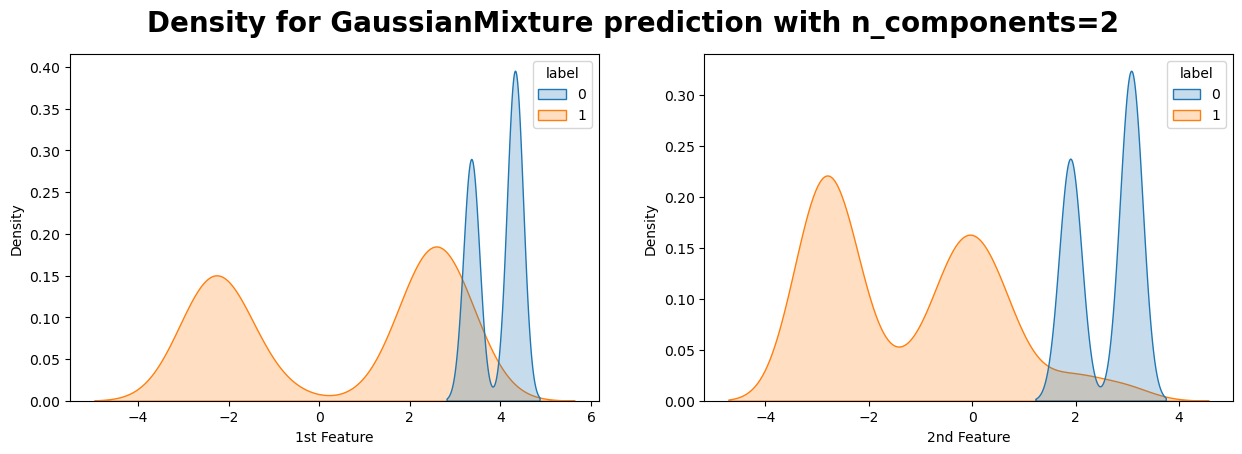

In [58]:
kmeans = KMeans(n_clusters=2, random_state=511)
gmm = GaussianMixture(n_components=2, random_state=21)

y_kmeans_hat = kmeans.fit_predict(X_train)
y_gmm_hat = gmm.fit_predict(X_train)

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
show_scatter(X_train, y_kmeans_hat, ax=axs[0], title='KMeans, n_clusters=2')
show_scatter(X_train, y_gmm_hat, ax=axs[1], title='GaussianMixture, n_components=2')
plt.show()

df_ = X_train.copy()
df_['label'] = kmeans.predict(X_train)
fig, axs = plt.subplots(1, 2, figsize=(15, 4.5))
sns.kdeplot(x='1st Feature', data=df_, hue='label',fill=True, ax=axs[0])
sns.kdeplot(x='2nd Feature', data=df_, hue='label',fill=True, ax=axs[1])
fig.suptitle('Density for KMeans prediction with n_clusters=2', fontsize=20, fontweight="bold")
plt.show()

df_ = X_train.copy()
df_['label'] = gmm.predict(X_train)
fig, axs = plt.subplots(1, 2, figsize=(15, 4.5))
sns.kdeplot(x='1st Feature', data=df_, hue='label',fill=True, ax=axs[0])
sns.kdeplot(x='2nd Feature', data=df_, hue='label',fill=True, ax=axs[1])
fig.suptitle('Density for GaussianMixture prediction with n_components=2', fontsize=20, fontweight="bold")
plt.show()